# **Project Title** :A Hierarchical Network-Based Method for Predicting Driver Traffic Violations

**Business Problem** :  Cities struggle to prevent traffic violations because they don't know where or when they'll happen. This project uses a network-based model to predict violations in advance so safety teams can act earlier and smarter.

**Objective** :
* Maximize road safety by finding places, times, and driver behaviors that often lead to violations.
* Minimize wasted police effort by predicting when and where traffic rules are most likely to be broken.
* Maximize awareness of how weather affects traffic violations to help plan safety measures in bad weather.

**Data Description** :
* Traffic Violation dataset of Montgomery County of Maryland ,USA
Source : https://catalog.data.gov/dataset/traffic-violations
* Weather Dataset of Montgomery County of Maryland ,USA

 Source : was exracted using **Meteostat** **Library**

**Data Dictonary**
* 	Traffic Stop Information
* 	Driver Information
* 	Vehicle Information
* 	Violation & Arrest Details
* 	Search Details
* 	Weather Information

Traget Variable
* Warnings  :  The driver was let go with just a warning; no legal penalty.
* Citation  :  A legal ticket was issued. The driver may need to pay a fine or appear in court.
* SERO (Safety Equipment Repair Order)     :  The driver is ordered to fix faulty vehicle equipment (e.g., broken lights, tires).
* ESERO (Electronic Statewide Electronic Reporting Option)    : A form of electronic citation or warning — used in Maryland for data reporting

Mouting the Drive to Extract Dataset from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing the Required Libraries**

In [ ]:
! pip install feature_engine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install torch==2.3.0+cu121 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.0/781.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1

In [ ]:
pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.4/950.4 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 9.3 MB/s eta 0:00:00


**Importing Required Libraries**

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from datetime import datetime
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")


**Uploading the Datasets**

In [ ]:
traffic_df = pd.read_csv('/content/drive/MyDrive/Group_project/traffic_violations_2021_2025.csv')

weather_df = pd.read_csv('/content/drive/MyDrive/Group_project/weather_2021_2025.csv')


In [ ]:
traffic_df.head() # To check the top 5 Rows of Data

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,2023-05-01,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,...,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,9be35886-e00c-49c2-8f27-2f6307696a17,2023-11-25,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,...,13-409(b),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
2,9be35886-e00c-49c2-8f27-2f6307696a17,2023-11-25,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,...,13-411(f),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
3,4d37fa99-0df3-4a56-9ba6-692bce894a34,2023-11-26,09:16:00,MCP,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.058378,-77.049652,No,...,21-902(a1i),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0583783333333, -77.0496516666667)"
4,3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49,2023-11-25,05:45:00,MCP,"4th District, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,0.000000,0.000000,No,...,21-901.1(a),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [ ]:
weather_df.head() # To check the top 5 Rows of Data

,Date Of Stop,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,SubAgency
0,01-01-2021,1.6,0.5,3.6,20.6,0.0,10,2.5,NaN,1027.7,NaN,"3rd District, Silver Spring"
1,02-01-2021,6.6,2.4,13.1,2.1,0.0,332,4.7,NaN,1014.7,NaN,"3rd District, Silver Spring"
2,03-01-2021,3.2,2.5,4.2,6.1,0.0,356,4.3,NaN,1015.4,NaN,"3rd District, Silver Spring"
3,04-01-2021,3.3,-1.5,7.0,0.0,0.0,342,2.9,NaN,1016.0,NaN,"3rd District, Silver Spring"
4,05-01-2021,3.6,2.8,4.6,1.2,0.0,346,2.7,NaN,1014.3,NaN,"3rd District, Silver Spring"


In [ ]:
traffic_df.columns = traffic_df.columns.str.strip().str.lower().str.replace(' ', '_')
# Too see the Column Names of Datasets
print(traffic_df.columns.tolist())


['seqid', 'date_of_stop', 'time_of_stop', 'agency', 'subagency', 'description', 'location', 'latitude', 'longitude', 'accident', 'belts', 'personal_injury', 'property_damage', 'fatal', 'commercial_license', 'hazmat', 'commercial_vehicle', 'alcohol', 'work_zone', 'search_conducted', 'search_disposition', 'search_outcome', 'search_reason', 'search_reason_for_stop', 'search_type', 'search_arrest_reason', 'state', 'vehicletype', 'year', 'make', 'model', 'color', 'violation_type', 'charge', 'article', 'contributed_to_accident', 'race', 'gender', 'driver_city', 'driver_state', 'dl_state', 'arrest_type', 'geolocation']


In [ ]:
weather_df.columns = weather_df.columns.str.strip().str.lower().str.replace(' ', '_')
# Too see the Column Names of Datasets
print(weather_df.columns.tolist())

['date_of_stop', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'subagency']


Dataset Overview:
* The number of entries (rows)
* The number of columns
* Column names and data types
* Non-null counts for each column

In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309025 entries, 0 to 309024
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   seqid                    309025 non-null  object 
 1   date_of_stop             309025 non-null  object 
 2   time_of_stop             309025 non-null  object 
 3   agency                   309025 non-null  object 
 4   subagency                309025 non-null  object 
 5   description              309024 non-null  object 
 6   location                 309023 non-null  object 
 7   latitude                 309025 non-null  float64
 8   longitude                309025 non-null  float64
 9   accident                 309025 non-null  object 
 10  belts                    309025 non-null  object 
 11  personal_injury          309025 non-null  object 
 12  property_damage          309025 non-null  object 
 13  fatal                    309025 non-null  object 
 14  comm

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_of_stop  11109 non-null  object 
 1   tavg          11109 non-null  float64
 2   tmin          11109 non-null  float64
 3   tmax          11109 non-null  float64
 4   prcp          11109 non-null  float64
 5   snow          11002 non-null  float64
 6   wdir          11109 non-null  int64  
 7   wspd          11109 non-null  float64
 8   wpgt          0 non-null      float64
 9   pres          11109 non-null  float64
 10  tsun          0 non-null      float64
 11  subagency     11109 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
traffic_df.shape # Shape of the DataFrame

(309025, 43)

In [ ]:
weather_df.shape # Shape of the DataFrame

(11109, 12)

Extracting the Unquie Values Count in the Violation_type

In [ ]:
print(traffic_df['violation_type'].value_counts())

violation_type
Warning     189746
Citation    109717
ESERO         9559
SERO             3
Name: count, dtype: int64


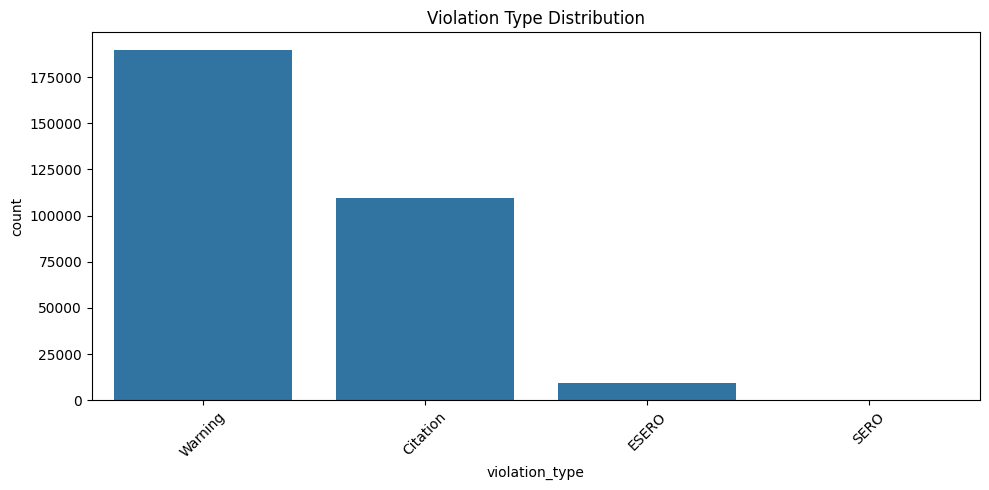

In [ ]:
#  Bar plot on Violation Type FOR Distrubtion
plt.figure(figsize=(10,5))
sns.countplot(data=traffic_df, x='violation_type', order=traffic_df['violation_type'].value_counts().index)
plt.title('Violation Type Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

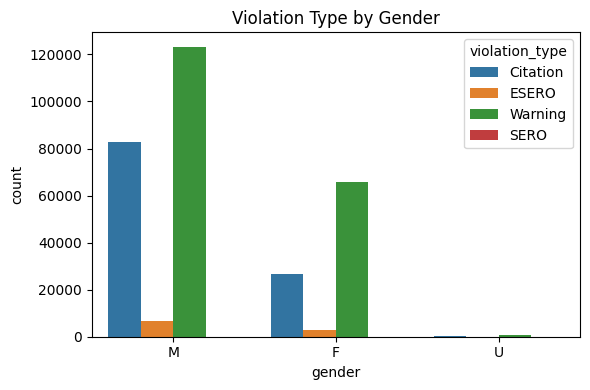

In [ ]:
# countplot for Violations by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=traffic_df, x='gender', hue='violation_type')
plt.title('Violation Type by Gender')
plt.tight_layout()
plt.show()

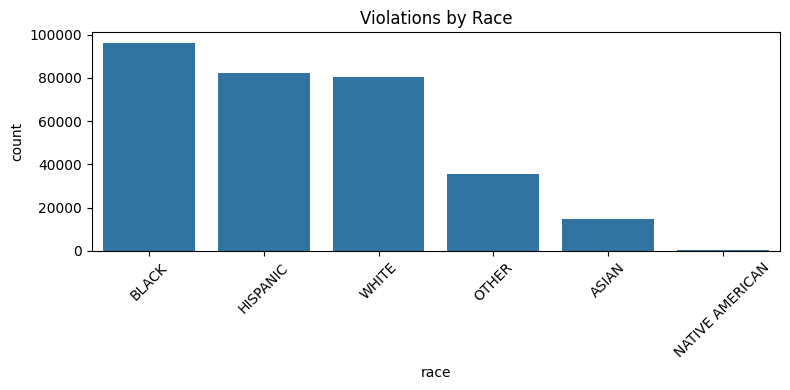

In [ ]:

# Bar Plot - Violations by Race

plt.figure(figsize=(8,4))
sns.countplot(data=traffic_df, x='race', order=traffic_df['race'].value_counts().index)
plt.title('Violations by Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

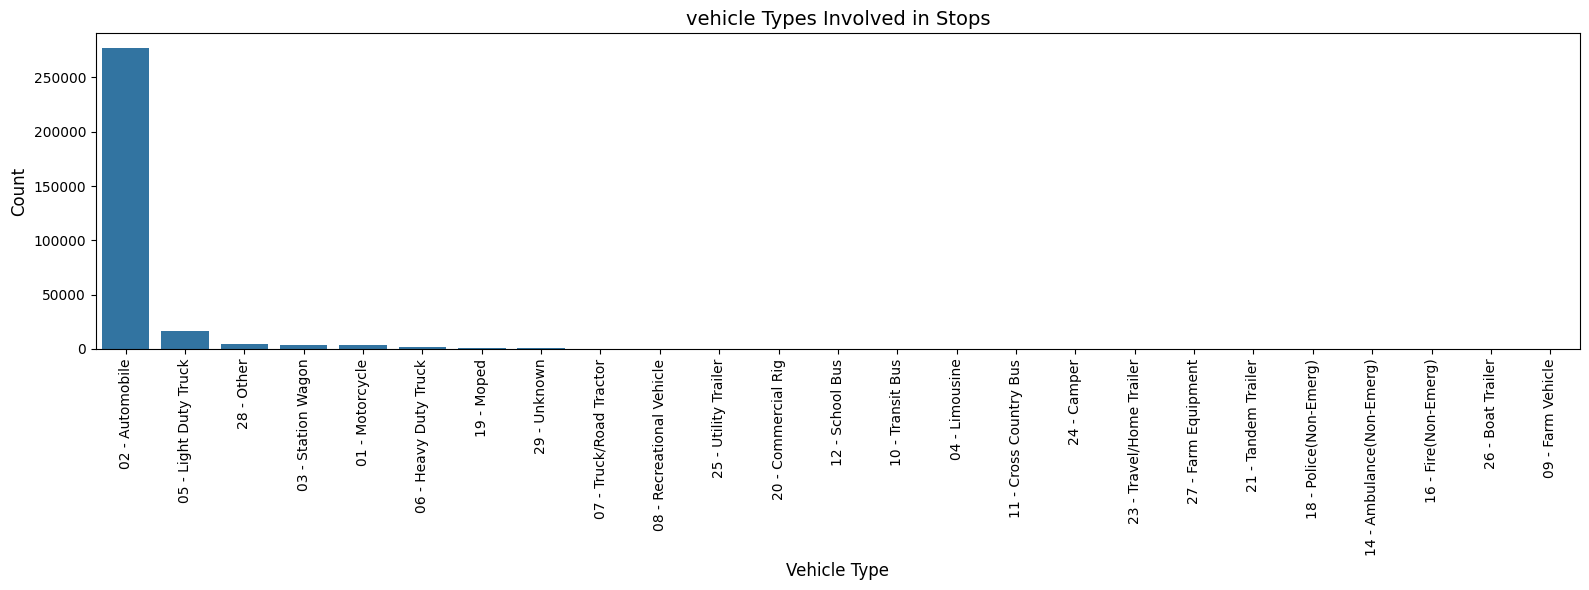

In [ ]:

# Bar plot - Vehicle Type Distribution

plt.figure(figsize=(16,6))  # Wider figure
sns.countplot(data=traffic_df, x='vehicletype', order=traffic_df['vehicletype'].value_counts().index)
plt.title('vehicle Types Involved in Stops', fontsize=14)
plt.xticks(rotation=90, fontsize=10)  # Rotate for clarity
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


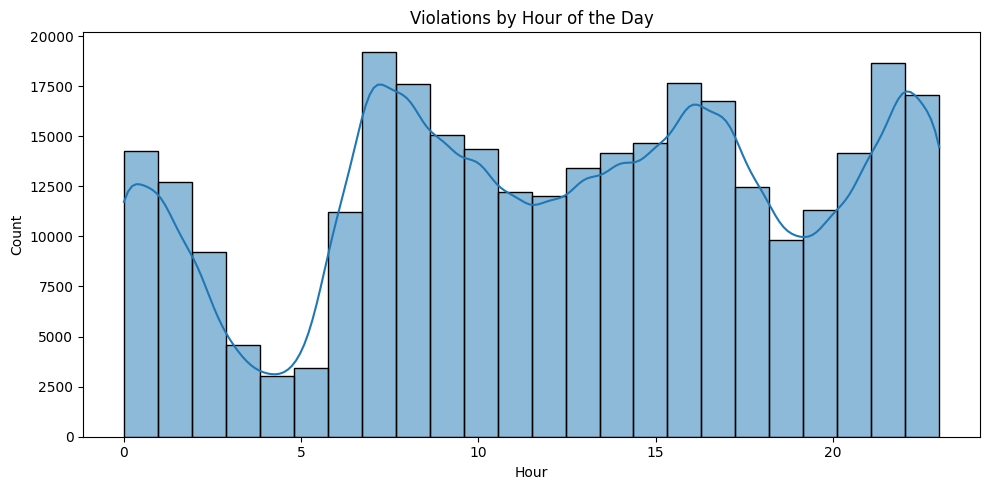

In [ ]:

# Kernel Density Estimate (KDE) curve. - Time of Stop Analysis

# Convert time to datetime format
traffic_df['Hour'] = pd.to_datetime(traffic_df['time_of_stop'], format='%H:%M:%S', errors='coerce').dt.hour

plt.figure(figsize=(10,5))
sns.histplot(data=traffic_df, x='Hour', bins=24, kde=True)
plt.title('Violations by Hour of the Day')
plt.xlabel('Hour')
plt.tight_layout()
plt.show()

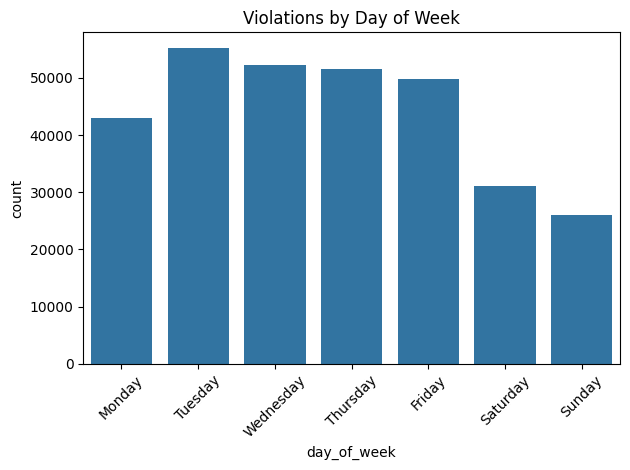

In [ ]:
# Bar plot - Time-Based Analysis
# Violations by Day of Week
traffic_df['day_of_week'] = pd.to_datetime(traffic_df['date_of_stop']).dt.day_name()
sns.countplot(data=traffic_df, x='day_of_week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Violations by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


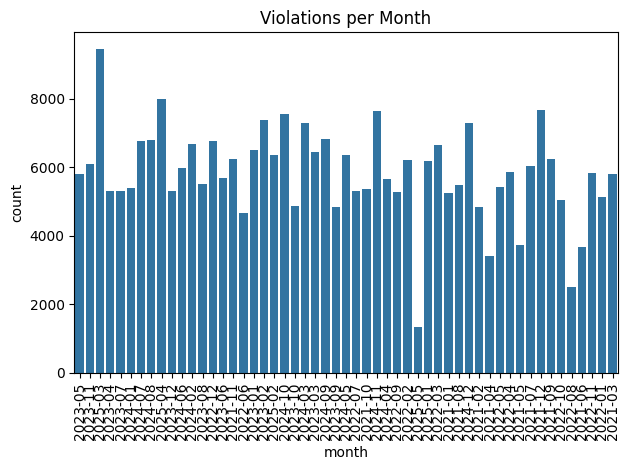

In [ ]:
# Bar Plot - Trend Over Time (Monthly Violations)
traffic_df['month'] = pd.to_datetime(traffic_df['date_of_stop']).dt.to_period('M')
traffic_df['month'] = traffic_df['month'].astype(str)
sns.countplot(data=traffic_df, x='month')
plt.title('Violations per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


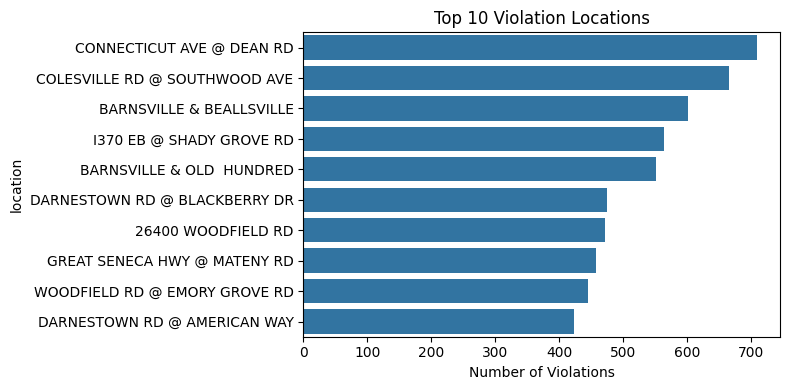

In [ ]:

# Horizontal Bar plot - Top Violation Locations

top_locations = traffic_df['location'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Violation Locations')
plt.xlabel('Number of Violations')
plt.tight_layout()
plt.show()

# **Data Preprocessing**

Here We are Merging SERO into ESERO
Because the both of the Same
SERO is Getting a Penailty or Tickect on the on Hand When Vechile is stopped
ESERO is Getting a Ticket on online .

In [ ]:
# Merging SERO (count of 3) is merged with ESERO
traffic_df['violation_type'] = traffic_df['violation_type'].replace('SERO', 'ESERO')
traffic_df['violation_type'].value_counts()

,count
violation_type,
Warning,189746
Citation,109717
ESERO,9562


In [ ]:
# Extracting date_only column from the date_of_stop s
traffic_df['date_of_stop'] = pd.to_datetime(traffic_df['date_of_stop'], errors='coerce')
traffic_df['date_only'] = pd.to_datetime(traffic_df['date_of_stop']).dt.date
traffic_df['year'] = traffic_df['date_of_stop'].dt.year       # Extracting year Column from the date_of_stop  in Traffic data
weather_df['date_only'] = pd.to_datetime(weather_df['date_of_stop'], dayfirst=True).dt.date
# Extracting the year from 'Date Of Stop' in Weather data
weather_df['year'] = weather_df['date_of_stop'].dt.year

**Type Conversion**

Applying Type Conversion on the Traffic Data

In [ ]:
#  Convert numerical columns
traffic_df['latitude'] = pd.to_numeric(traffic_df['latitude'], errors='coerce')
traffic_df['longitude'] = pd.to_numeric(traffic_df['longitude'], errors='coerce')



In [ ]:
# Convert boolean-like columns to actual bool type
bool_columns = [
    'accident', 'belts', 'personal_injury', 'property_damage', 'fatal',
    'commercial_license', 'hazmat', 'commercial_vehicle', 'alcohol', 'work_zone',
    'contributed_to_accident'
]

for col in bool_columns:
    traffic_df[col] = traffic_df[col].astype('bool')




In [ ]:

# Convert categorical columns (non-search-related)

categorical_cols = [
    'agency', 'subagency', 'description', 'location', 'state', 'vehicletype', 'make', 'model',
    'color', 'violation_type', 'charge', 'article', 'race', 'gender', 'driver_city',
    'driver_state', 'dl_state', 'arrest_type'
]
traffic_df[categorical_cols] = traffic_df[categorical_cols].astype('category')




In [ ]:
# Convert search-related columns to category
search_cols = [
    'search_conducted', 'search_disposition', 'search_outcome',
       'search_reason', 'search_reason_for_stop', 'search_type',
       'search_arrest_reason'
]
traffic_df[search_cols] = traffic_df[search_cols].astype('category')



In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309025 entries, 0 to 309024
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   seqid                    309025 non-null  object        
 1   date_of_stop             309025 non-null  datetime64[ns]
 2   time_of_stop             309025 non-null  object        
 3   agency                   309025 non-null  category      
 4   subagency                309025 non-null  category      
 5   description              309024 non-null  category      
 6   location                 309023 non-null  category      
 7   latitude                 309025 non-null  float64       
 8   longitude                309025 non-null  float64       
 9   accident                 309025 non-null  bool          
 10  belts                    309025 non-null  bool          
 11  personal_injury          309025 non-null  bool          
 12  property_damage 

Applying Type Conversion on Weather Data

In [ ]:
# Convert Date Of Stop to datetime
weather_df['date_of_stop'] = pd.to_datetime(weather_df['date_of_stop'], dayfirst=True, errors='coerce')

In [ ]:
# Convert SubAgency to category
weather_df['subagency'] = weather_df['subagency'].astype('category')

In [ ]:
# Convert wdir to float for consistency
weather_df['wdir'] = weather_df['wdir'].astype(float)

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_of_stop  11109 non-null  datetime64[ns]
 1   tavg          11109 non-null  float64       
 2   tmin          11109 non-null  float64       
 3   tmax          11109 non-null  float64       
 4   prcp          11109 non-null  float64       
 5   snow          11002 non-null  float64       
 6   wdir          11109 non-null  float64       
 7   wspd          11109 non-null  float64       
 8   wpgt          0 non-null      float64       
 9   pres          11109 non-null  float64       
 10  tsun          0 non-null      float64       
 11  subagency     11109 non-null  category      
 12  date_only     11109 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(10), object(1)
memory usage: 1.0+ MB


# **Handling duplicates**

In [ ]:
# Checking for duplicate rows in the Traffic DataFrame
duplicate_rows = traffic_df.duplicated()
# finding total no of duplicates
print("Total duplicate rows:", duplicate_rows.sum())

Total duplicate rows: 274


In [ ]:
# Removing duplicate rows (keeping first occurrence)
traffic_df.drop_duplicates(inplace=True)
print(traffic_df.shape)

(308751, 47)


In [ ]:
# Checking for duplicate rows in the Weather DataFrame
duplicate_row = weather_df.duplicated()
# finding total no of duplicates
print("Total duplicate row:", duplicate_row.sum())

Total duplicate row: 0


No Duplicates found in weather data

## **Handling Missing Values**

Treating Missing Values in Traffic Data

In [ ]:
# Checking missing values
traffic_df.isnull().sum()


,0
seqid,0
date_of_stop,0
time_of_stop,0
agency,0
subagency,0
description,1
location,2
latitude,0
longitude,0
accident,0


We Are Dropping the Search Related columns because
Because these Columns has no Relation with respective to our Traget Variable ( violation_type)
these Column as the most missing values if even treat them also we will have more sparse data

In [ ]:
# Dropping the Search related data
traffic_df.drop(columns=[
    'search_conducted', 'search_disposition', 'search_outcome',
       'search_reason', 'search_reason_for_stop', 'search_type',
       'search_arrest_reason'
], inplace=True)

print(traffic_df.shape)


(308751, 40)


In [ ]:
print(traffic_df.columns)
print(traffic_df.isnull().sum())

Index(['seqid', 'date_of_stop', 'time_of_stop', 'agency', 'subagency',
       'description', 'location', 'latitude', 'longitude', 'accident', 'belts',
       'personal_injury', 'property_damage', 'fatal', 'commercial_license',
       'hazmat', 'commercial_vehicle', 'alcohol', 'work_zone', 'state',
       'vehicletype', 'year', 'make', 'model', 'color', 'violation_type',
       'charge', 'article', 'contributed_to_accident', 'race', 'gender',
       'driver_city', 'driver_state', 'dl_state', 'arrest_type', 'geolocation',
       'date_only', 'Hour', 'day_of_week', 'month'],
      dtype='object')
seqid                         0
date_of_stop                  0
time_of_stop                  0
agency                        0
subagency                     0
description                   1
location                      2
latitude                      0
longitude                     0
accident                      0
belts                         0
personal_injury               0
property_damage

Rather than filling with simple imputation. To fill missing values, we used associated columns with no null values in the following steps.
* Create Mapping Dictionary: Here, all the Unquie Values from the two columns are mapped and kept in a dictionary.

* Using this Mapping Dictionary, we will fill the missing values.



Here we are trying to fill the Missing values of Description column associated with the Charge column

In [ ]:
# Create mapping dictionary
charge_to_desc_map = (
    traffic_df[traffic_df['description'].notnull()]
    .drop_duplicates(subset=['charge', 'description'])
    .set_index('charge')['description']
    .to_dict()
)


In [ ]:
# using Mapping Dictionary
traffic_df['description'] = traffic_df.apply(
    lambda row: charge_to_desc_map.get(row['charge'], row['description'])
    if pd.isnull(row['description']) else row['description'],
    axis=1
)


In [ ]:
traffic_df['description'].isnull().sum() # Checking fo rnull Values


np.int64(0)

Here we are trying to fill the Missing values of Location column associated with the SubAgency column

In [ ]:
# Step 1: Build a mapping from SubAgency to the most common Location
subagency_to_location = (
    traffic_df[traffic_df['location'].notna()]
    .groupby('subagency')['location']
    .agg(lambda x: x.mode().iloc[0])
    .to_dict()
)

# Step 2: Fill missing Location values using SubAgency mapping
traffic_df['location'] = traffic_df.apply(
    lambda row: subagency_to_location.get(row['subagency'], row['location'])
                if pd.isna(row['location']) else row['location'],
    axis=1
)


In [ ]:
traffic_df['location'].isnull().sum() # Checking fo rnull Values

np.int64(0)

In [ ]:
print(traffic_df['article'].value_counts()) # Checking the count of the Article with Unquie Values

article
Transportation Article    295872
Maryland Rules              3297
BR                            15
00                             3
TG                             2
Name: count, dtype: int64


Here We Are Replacing the 00 Value as BR
based on the Research we find out that 00 was a Human Error

In [ ]:
# Replace '00' with 'BR' in the 'Article' column
traffic_df['article'] = traffic_df['article'].replace('00', 'BR')


In [ ]:
print(traffic_df['article'].value_counts())

article
Transportation Article    295872
Maryland Rules              3297
BR                            18
TG                             2
Name: count, dtype: int64


Based on Research we came to know that where ever missing values are there in that case there was no Article was needed

That is the Reason we have a new Categories to the Article Column(no_article) and then filled those missing values

In [ ]:
# Add 'No Article' to the existing categories
traffic_df['article'] = traffic_df['article'].cat.add_categories('no_article')

# Now, fill the missing values with 'No Article'
traffic_df['article'] = traffic_df['article'].fillna('no_article')


In [ ]:
traffic_df['article'].isnull().sum()


np.int64(0)

In [ ]:
# Counting unique values in 'race'
race_counts = traffic_df['race'].value_counts()
print("Unique values in 'race':")
print(race_counts)

# Counting unique values in 'driver_City'
driver_city_counts = traffic_df['driver_city'].value_counts()
print("\nUnique values in 'Driver City':")
print(driver_city_counts)

# Counting unique values in 'driver_state'
driver_city_counts = traffic_df['driver_state'].value_counts()
print("\nUnique values in 'Driver State':")
print(driver_city_counts)

Unique values in 'race':
race
BLACK              96114
HISPANIC           81934
WHITE              80256
OTHER              35590
ASIAN              14640
NATIVE AMERICAN      217
Name: count, dtype: int64

Unique values in 'Driver City':
driver_city
SILVER SPRING         68656
GAITHERSBURG          37367
GERMANTOWN            32504
ROCKVILLE             23433
MONTGOMERY VILLAGE    10244
                      ...  
N. HOLLYWOOD              1
N. ARLINGTON              1
N VERSAILLES              1
N UPPER MARLBORO          1
NEEDMORE                  1
Name: count, Length: 3315, dtype: int64

Unique values in 'Driver State':
driver_state
MD    281598
DC     10449
VA      7962
PA      1268
FL      1006
NY       882
NC       553
WV       553
NJ       517
TX       475
CA       452
GA       374
MA       236
DE       216
OH       171
WA       164
SC       158
IL       157
TN       134
XX       134
MI       103
CT       100
AZ        98
CO        78
AL        71
IN        70
MS        66
WI 

1. Cramér's V (for two categorical variables)
It’s a good choice for measuring the strength of association between two categorical columns like:

Driver City ↔ Location

Driver City ↔ Driver State

Driver City ↔ DL State

In [ ]:
# Implementation of Cramér’s V
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [ ]:
# Calculate Cramér’s V between Driver City and other candidate columns
v1 = cramers_v(traffic_df['driver_city'], traffic_df['location'])
v2 = cramers_v(traffic_df['driver_city'], traffic_df['driver_state'])
v3 = cramers_v(traffic_df['driver_city'], traffic_df['dl_state'])

print(f"Cramér’s V (Driver City vs Location): {v1:.4f}")
print(f"Cramér’s V (Driver City vs Driver State): {v2:.4f}")
print(f"Cramér’s V (Driver City vs DL State): {v3:.4f}")


Cramér’s V (Driver City vs Location): 0.4484
Cramér’s V (Driver City vs Driver State): 0.8923
Cramér’s V (Driver City vs DL State): 0.6653


Here We can conculde that Driver_city and Driver_state has correlation

Interpretation of Cramér’s V
* | Value     | Interpretation          |

* | 0.00–0.10 | Very weak association   |
* | 0.10–0.20 | Weak association        |
* | 0.20–0.40 | Moderate association    |
* | 0.40–0.60 | Strong association      |
* | > 0.60    | Very strong association |


# Fill Missing Driver City Using Most Common City per Driver State
This means:

For each Driver State, find the most frequent Driver City.

Then use that to fill missing values in Driver City.

In [ ]:
#  Create a mapping of Driver State → Most common Driver City
state_city_mode = (
    traffic_df[~traffic_df['driver_city'].isna()]
    .groupby('driver_state')['driver_city']
    .agg(lambda x: x.mode().iloc[0])  # get most frequent city per state
)

# Fill missing Driver City values based on Driver State
traffic_df['driver_city'] = traffic_df.apply(
    lambda row: state_city_mode[row['driver_state']] if pd.isna(row['driver_city']) and row['driver_state'] in state_city_mode else row['driver_city'],
    axis=1
)


In [ ]:
# Check how many are still missing
traffic_df['driver_city'].isna().sum()


np.int64(0)

In [ ]:
print(traffic_df['make'].value_counts()) # Count the unquie the values in Make column

make
TOYOTA        36480
HONDA         34208
FORD          26699
TOYT          18492
NISSAN        14955
              ...  
A                 1
WOLKSWAGON        1
WK TRK            1
WINNEBAGO         1
WINN              1
Name: count, Length: 1558, dtype: int64


In [ ]:
print(traffic_df['model'].value_counts()) # Count the unquie the values in Model column

model
SD              15435
CIVIC           13231
4S              13172
TK              11975
UT              11778
                ...  
ACCOSD              1
HIHIGHLANDER        1
HIGHLLANDER         1
HIGHLANER           1
E05                 1
Name: count, Length: 6524, dtype: int64


In [ ]:
print(traffic_df['color'].value_counts()) # Count the unquie the values in Color column

color
BLACK          72375
WHITE          61439
SILVER         47491
GRAY           46866
BLUE           22100
RED            21818
BLUE, DARK      6815
MAROON          4637
GOLD            4591
GREEN           3883
BLUE, LIGHT     2818
TAN             2571
BEIGE           1740
GREEN, DK       1460
ORANGE          1169
BROWN            994
GREEN, LGT       923
YELLOW           864
BRONZE           566
PURPLE           524
MULTICOLOR       254
CREAM            108
COPPER            71
PINK              62
CAMOUFLAGE         4
CHROME             3
Name: count, dtype: int64


In [ ]:
# Fill Make using most common Make per VehicleType
make_mode = (
    traffic_df[~traffic_df['make'].isna()]
    .groupby('vehicletype')['make']
    .agg(lambda x: x.mode().iloc[0])
)

traffic_df['make'] = traffic_df.apply(
    lambda row: make_mode[row['vehicletype']] if pd.isna(row['make']) and row['vehicletype'] in make_mode else row['make'],
    axis=1
)


In [ ]:
traffic_df[['make']].isna().sum()

,0
make,0


In [ ]:
#  Fill 'Model' using most common Model per Make
model_mode = (
    traffic_df[~traffic_df['model'].isna()]
    .groupby('make')['model']
    .agg(lambda x: x.mode().iloc[0])
)

traffic_df['model'] = traffic_df.apply(
    lambda row: model_mode[row['make']] if pd.isna(row['model']) and row['make'] in model_mode else row['model'],
    axis=1
)

#  Fill remaining 'Model' with overall most common model
most_common_model = traffic_df['model'].mode().iloc[0]
traffic_df['model'].fillna(most_common_model, inplace=True)

In [ ]:
traffic_df[['model']].isna().sum()

,0
model,0


In [ ]:
# Fill 'Color' using most common Color per Model
color_mode = (
    traffic_df[~traffic_df['color'].isna()]
    .groupby('model')['color']
    .agg(lambda x: x.mode().iloc[0])
)

traffic_df['color'] = traffic_df.apply(
    lambda row: color_mode[row['model']] if pd.isna(row['color']) and row['model'] in color_mode else row['color'],
    axis=1
)

#  Fill remaining 'Color' with overall most common color
most_common_color = traffic_df['color'].mode().iloc[0]
traffic_df['color'].fillna(most_common_color, inplace=True)

In [ ]:
traffic_df[['color']].isna().sum()


,0
color,0


In [ ]:
traffic_df.isna().sum()

,0
seqid,0
date_of_stop,0
time_of_stop,0
agency,0
subagency,0
description,0
location,0
latitude,0
longitude,0
accident,0


We Have Missing Values in the Latitude and Longitde column we are the using Assoicated column SuBAgency and filling them

In [ ]:
#  Show initial count of 0's in latitude/longitude columns
initial_zero_count = (traffic_df['latitude'] == 0).sum()
print(f"Initial zero values in Latitude: {initial_zero_count}")
print(f"Initial zero values in Longitude: {(traffic_df['longitude'] == 0).sum()}\n")

# Enhanced Imputation with Multiple Fallbacks
print("Applying enhanced imputation with hierarchical fallbacks...")

# Create mapping dictionaries with different priority levels
coord_maps = [
    # Highest priority: Exact Location-SubAgency matches
    traffic_df[(traffic_df['latitude'] != 0) & (traffic_df['longitude'] != 0)]
        .drop_duplicates(['location', 'subagency'])
        .set_index(['location', 'subagency'])
        [['latitude', 'longitude']].apply(tuple, axis=1)
        .to_dict(),

    # Medium priority: Location-only matches
    traffic_df[(traffic_df['latitude'] != 0) & (traffic_df['longitude'] != 0)]
        .drop_duplicates(['location'])
        .set_index('location')
        [['latitude', 'longitude']].apply(tuple, axis=1)
        .to_dict(),

    # Lowest priority: Agency-level medians
    traffic_df[(traffic_df['latitude'] != 0) & (traffic_df['longitude'] != 0)]
        .groupby('agency')
        [['latitude', 'longitude']].median()
        .apply(tuple, axis=1)
        .to_dict()
]

def impute_coordinates_enhanced(row):
    current_lat, current_lon = row['latitude'], row['longitude']

    if current_lat == 0 or current_lon == 0:
        # Try Location-SubAgency match first
        key = (row['location'], row['subagency'])
        if key in coord_maps[0]:
            return coord_maps[0][key]

        # Then try Location-only match
        if row['location'] in coord_maps[1]:
            return coord_maps[1][row['location']]

        # Finally try Agency-level
        if row['agency'] in coord_maps[2]:
            return coord_maps[2][row['agency']]

    return (current_lat, current_lon)

# Apply the imputation
traffic_df[['latitude', 'longitude']] = traffic_df.apply(
    impute_coordinates_enhanced,
    axis=1,
    result_type='expand'
)

# Verify results
post_impute_zero_count = (traffic_df['latitude'] == 0).sum()
print("\nImputation Results:")
print(f"Zero values remaining in Latitude: {post_impute_zero_count}")
print(f"Zero values remaining in Longitude: {(traffic_df['longitude'] == 0).sum()}")
print(f"Total zeros imputed: {initial_zero_count - post_impute_zero_count}")

#  Show imputation effectiveness
if initial_zero_count > 0:
    imputation_rate = ((initial_zero_count - post_impute_zero_count) / initial_zero_count) * 100
    print(f"\nImputation success rate: {imputation_rate:.2f}%")
else:
    print("\nNo zero values found in initial data")

Initial zero values in Latitude: 26840
Initial zero values in Longitude: 26840

Applying enhanced imputation with hierarchical fallbacks...

Imputation Results:
Zero values remaining in Latitude: 0
Zero values remaining in Longitude: 0
Total zeros imputed: 26840

Imputation success rate: 100.00%


# **Handling Missing Values in Weather Data**

In [ ]:
weather_df.isna().sum()

,0
date_of_stop,0
tavg,0
tmin,0
tmax,0
prcp,0
snow,107
wdir,0
wspd,0
wpgt,11109
pres,0


Since wpgt and wdir columns are have completely null values
.Hence We Dropping them

In [ ]:
# Drop 'wpgt' and 'wdir' columns in place
weather_df.drop(columns=['wpgt', 'tsun'], inplace=True)


In [ ]:
print(weather_df.columns)

Index(['date_of_stop', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd',
       'pres', 'subagency', 'date_only'],
      dtype='object')


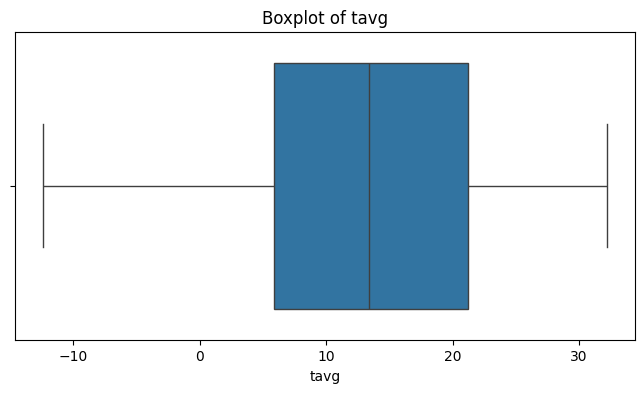

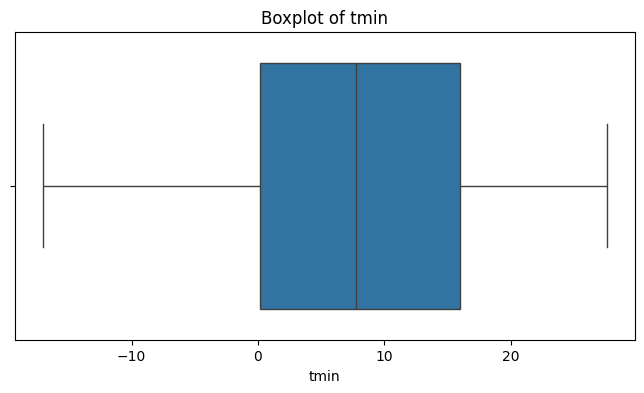

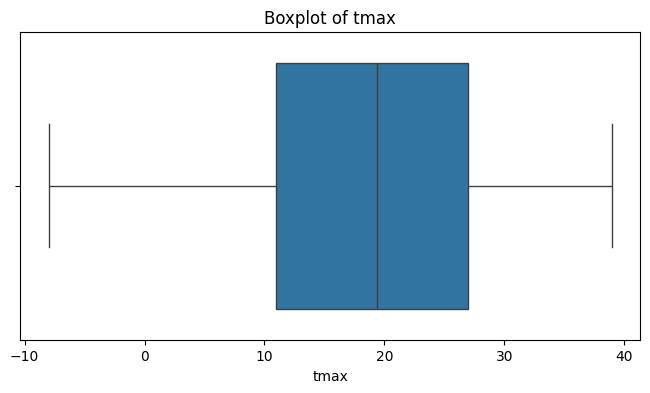

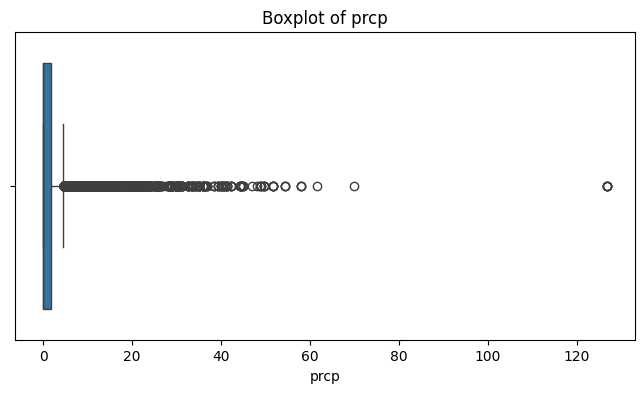

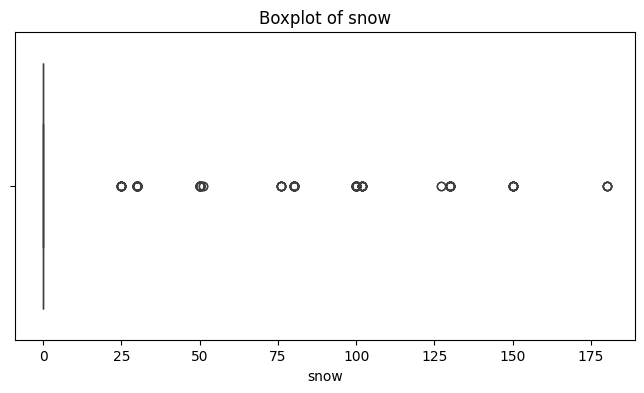

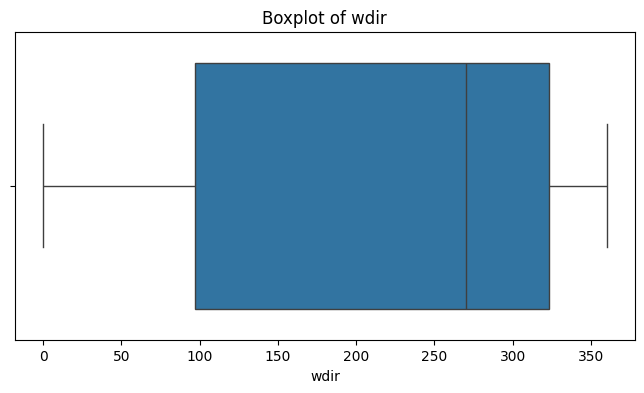

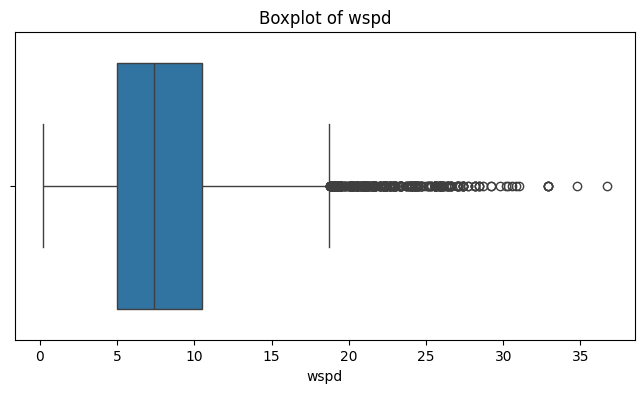

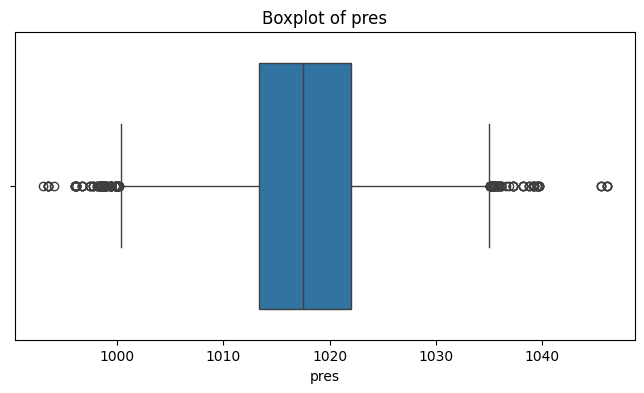

In [ ]:
# Checking for Outliers using Boxplot
numeric_cols = weather_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=weather_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
print(weather_df['snow'].value_counts())

snow
0.0      10756
30.0        48
50.0        47
100.0       38
80.0        32
130.0       23
25.0        18
102.0       12
150.0       12
76.0         7
180.0        5
127.0        2
51.0         2
Name: count, dtype: int64


Snowfall in the region occurs predominantly during the winter months — November through March.

If the precipitation (prcp) is 0, it implies no atmospheric moisture, so snowfall must also be 0.

Therefore, we impute missing or zero snow values using the following rules:

If prcp == 0 → snow = 0.0

If the date falls in a snow-prone month (Nov–Mar) and prcp > 0 → use the monthly average snowfall for imputation

If the date falls outside snow-prone months → set snow = 0.0 regardless of prcp

This approach aligns data processing with seasonal weather patterns and ensures climate-consistent imputation.

In [ ]:
# Replace empty strings with NaN in 'snow' column
weather_df['snow'] = weather_df['snow'].replace('', np.nan)

# Extract month from 'Date Only' column
weather_df['date_only'] = pd.to_datetime(weather_df['date_only'], errors='coerce')
weather_df['month'] = weather_df['date_only'].dt.month


# Compute monthly average snow excluding 0.0 and NaNs
valid_snow = weather_df[(weather_df['snow'] > 0) & (~weather_df['snow'].isna())]
month_avg_snow = valid_snow.groupby('month')['snow'].mean().to_dict()

# Define the imputation function
def impute_snow(row, month_avg_snow):
    if pd.isna(row['snow']) or row['snow'] == 0.0:
        if row['prcp'] == 0:
            return 0.0
        elif row['month'] in [11, 12, 1, 2, 3]:
            return month_avg_snow.get(row['month'], 0.0)
        else:
            return 0.0
    else:
        return row['snow']

# Apply the imputation
weather_df['snow'] = weather_df.apply(lambda row: impute_snow(row, month_avg_snow), axis=1)

# Final check
print("Remaining null values in snow column:", weather_df['snow'].isnull().sum())



Remaining null values in snow column: 0


In [ ]:
weather_df['snow'].isna().sum()

np.int64(0)

As snow column have low-variation issue, we are not including in capping method.

**Pressure (pres):**

* Unit: hPa (hectopascals) or inches of mercury (inHg) — check your dataset (likely hPa)
* Typical Range: 980–1050 hPa (or 28.94–31.00 inHg)
* Use in Project: Not a direct driver behavior factor, but correlates with weather patterns (e.g., low pressure → storms).
**In our data, ranges between 990-1046 ( which is in relevant range). So, leaving them as is**

**Wind Speed (wspd):**

* Unit: Miles per hour (mph)
* Typical Range: 0–20 mph normally; >40 mph during storms
* Use in Project: High winds may cause erratic driving, lane drifting, or increase risk of accidents (especially for high-profile vehicles like trucks).
Potential Outliers:

* Wind speeds > 30–40 mph might seem unusual but are real in storm events.
* These events are likely causally linked to traffic violations like swerving or loss of control.

**In our data, ranges between 0.2 - 36.7 ( In relevant range). So, leaving them as is**

**Precipitation (prcp):**

* Unit: Inches (daily total)
* Typical Range: 0.0 (no rain) to ~1.0 inches for normal rain days; 2–5 inches during storms
* Use in Project: Affects road conditions, visibility, and braking. Can increase violation risk (e.g., speeding in wet conditions).
Potential Outliers:

* Values above 2–3 inches might seem extreme but could be valid during thunderstorms, hurricanes, or flash floods.
* Outliers may reflect rare but real conditions that cause spikes in traffic incidents.

In our data ranges between 0-70 and one extreme value 126.5
 ( which is different from realistic conditions), we need to treat these outliers **bold text**



In [ ]:
# Initialize the Winsorizer
winsor = Winsorizer(
    capping_method='iqr',  # Interquartile range method
    tail='both',           # Cap both tails
    fold=1.5,              # Tukey's rule: 1.5*IQR
    variables=['prcp'],    # Column name in a list
    missing_values='ignore'
)

In [ ]:
# Fit and transform the data
weather_df = winsor.fit_transform(weather_df)

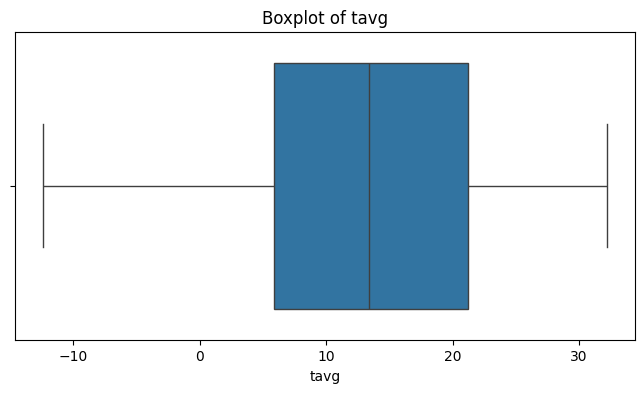

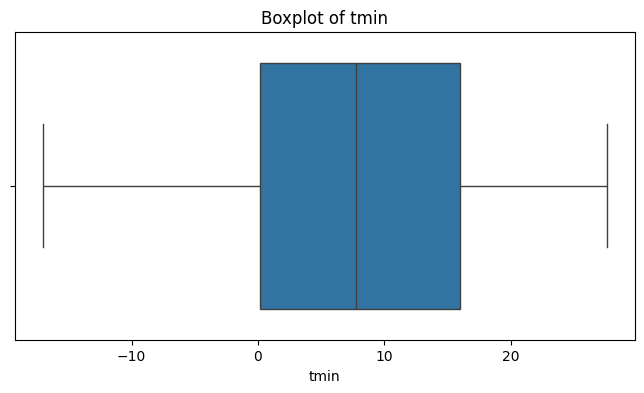

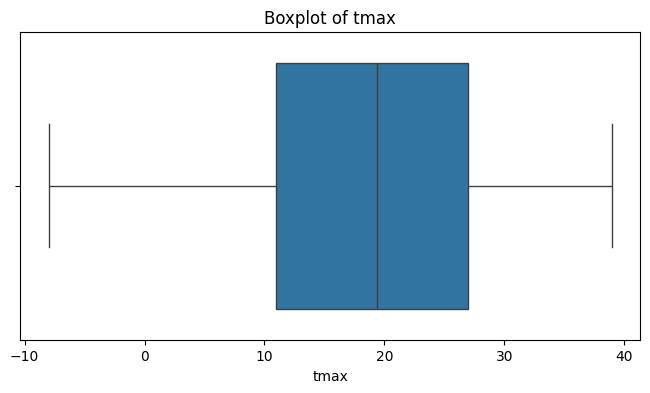

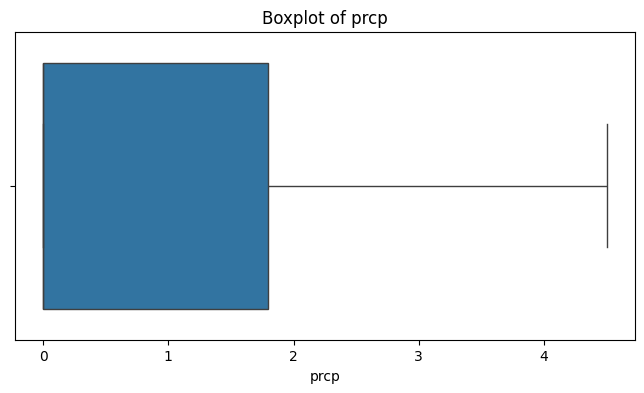

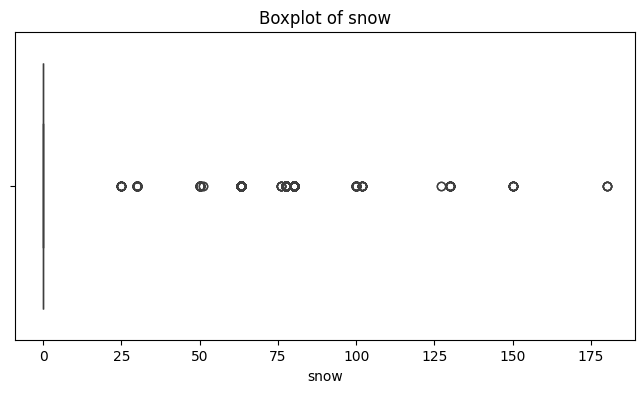

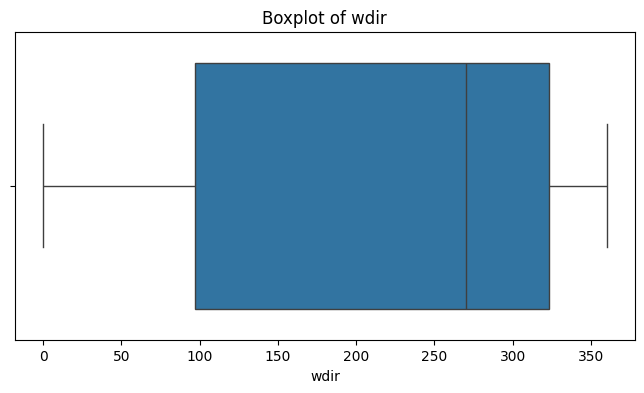

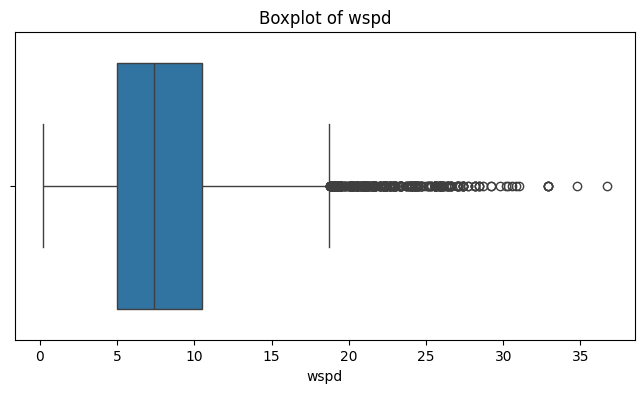

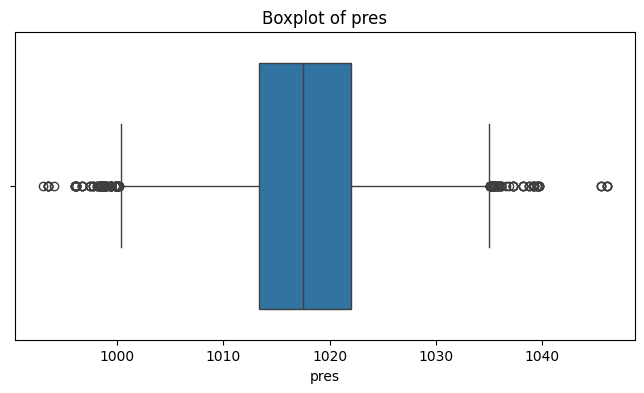

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=weather_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Checking the Data Type of  date_only column

In [ ]:
print(traffic_df['date_only'].dtype)
print(weather_df['date_only'].dtype)


object
datetime64[ns]


In [ ]:
traffic_df['date_only'] = pd.to_datetime(traffic_df['date_only'], errors='coerce')
weather_df['date_only'] = pd.to_datetime(weather_df['date_only'], errors='coerce')


Merged two datasets based on common_columns = ['date_only', 'subagency']
how='left': Keeps all records from traffic_violation and adds matching records from weather


In [ ]:
merged_df = pd.merge(
    traffic_df,
    weather_df,
    on=['date_only','subagency'],
    how='left'
)


In [ ]:
print(merged_df.head())
print(merged_df.info())

                                  seqid date_of_stop_x time_of_stop agency  \
0  52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca     2023-05-01     23:11:00    MCP   
1  9be35886-e00c-49c2-8f27-2f6307696a17     2023-11-25     00:20:00    MCP   
2  9be35886-e00c-49c2-8f27-2f6307696a17     2023-11-25     00:20:00    MCP   
3  4d37fa99-0df3-4a56-9ba6-692bce894a34     2023-11-26     09:16:00    MCP   
4  3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49     2023-11-25     05:45:00    MCP   

                                         subagency  \
0                      3rd District, Silver Spring   
1  6th District, Gaithersburg / Montgomery Village   
2  6th District, Gaithersburg / Montgomery Village   
3                            4th District, Wheaton   
4                            4th District, Wheaton   

                                         description  \
0    OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY   
1  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...   
2  DISPLAYING EXPIRED REGISTRATION PLA

In [ ]:
merged_df.isnull().sum() # Checking for null values

,0
seqid,0
date_of_stop_x,0
time_of_stop,0
agency,0
subagency,0
description,0
location,0
latitude,0
longitude,0
accident,0


In [ ]:
merged_df.shape # Shape of Merged_df

(308751, 52)

In [ ]:
merged_df.columns # To see the columns names

Index(['seqid', 'date_of_stop_x', 'time_of_stop', 'agency', 'subagency',
       'description', 'location', 'latitude', 'longitude', 'accident', 'belts',
       'personal_injury', 'property_damage', 'fatal', 'commercial_license',
       'hazmat', 'commercial_vehicle', 'alcohol', 'work_zone', 'state',
       'vehicletype', 'year_x', 'make', 'model', 'color', 'violation_type',
       'charge', 'article', 'contributed_to_accident', 'race', 'gender',
       'driver_city', 'driver_state', 'dl_state', 'arrest_type', 'geolocation',
       'date_only', 'Hour', 'day_of_week', 'month_x', 'date_of_stop_y', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'date_of_Stop',
       'year_y', 'month_y'],
      dtype='object')

Dropping Unwanted Columns

In [ ]:
# Columns to drop — identified as verbose, redundant, or non-informative
columns_to_drop = [
    'seqid', 'date_of_stop_y', 'description', 'agency',
    'geolocation', 'date_only', 'year_y', 'month_y'
]

# Drop the columns
merged_df.drop(columns=columns_to_drop, inplace=True)

# Confirm new shape and columns
print("Remaining columns:", merged_df.columns.tolist())
print("New shape:", merged_df.shape)



Remaining columns: ['date_of_stop_x', 'time_of_stop', 'subagency', 'location', 'latitude', 'longitude', 'accident', 'belts', 'personal_injury', 'property_damage', 'fatal', 'commercial_license', 'hazmat', 'commercial_vehicle', 'alcohol', 'work_zone', 'state', 'vehicletype', 'year_x', 'make', 'model', 'color', 'violation_type', 'charge', 'article', 'contributed_to_accident', 'race', 'gender', 'driver_city', 'driver_state', 'dl_state', 'arrest_type', 'Hour', 'day_of_week', 'month_x', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'date_of_Stop']
New shape: (308751, 44)


In [ ]:
merged_df.columns

Index(['date_of_stop_x', 'time_of_stop', 'subagency', 'location', 'latitude',
       'longitude', 'accident', 'belts', 'personal_injury', 'property_damage',
       'fatal', 'commercial_license', 'hazmat', 'commercial_vehicle',
       'alcohol', 'work_zone', 'state', 'vehicletype', 'year_x', 'make',
       'model', 'color', 'violation_type', 'charge', 'article',
       'contributed_to_accident', 'race', 'gender', 'driver_city',
       'driver_state', 'dl_state', 'arrest_type', 'Hour', 'day_of_week',
       'month_x', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd',
       'pres', 'date_of_Stop'],
      dtype='object')

# **Applying Encoding & Scaling on the Merged Dataframe**

Encoding the day_of_week

In [ ]:
# Strip whitespace if any and standardize case
merged_df['day_of_week'] = merged_df['day_of_week'].astype(str).str.strip().str.capitalize()

# Mapping dictionary
weekday_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

# Map and convert
merged_df['day_of_week'] = merged_df['day_of_week'].map(weekday_map)

In [ ]:
# Checking if we have any  unmapped values
unmapped = merged_df['day_of_week'].isnull().sum()
print(f"Unmapped (null) day values after mapping: {unmapped}")

Unmapped (null) day values after mapping: 0


In [ ]:
# Convert Month_x to datetime (if not already)
merged_df['month_x'] = pd.to_datetime(merged_df['month_x'], errors='coerce')

# Extract numeric month and year from the datetime
merged_df['month_x'] = merged_df['month_x'].dt.month
merged_df['year_x'] = merged_df['year_x'].astype(int)

# Check for any nulls after conversion
print(merged_df[['month_x', 'year_x']].isnull().sum())


month_x    0
year_x     0
dtype: int64


In [ ]:
numerical_cols = [
    'tavg', 'tmin', 'tmax',
    'prcp', 'snow',
    'wspd', 'wdir', 'pres',
    'Hour', 'day_of_week', 'month_x', 'year_x'
]
merged_df[numerical_cols].skew()

,0
tavg,-0.031463
tmin,0.070433
tmax,-0.127490
prcp,1.482688
snow,2.655475
wspd,1.257063
wdir,-0.589264
pres,0.110000
Hour,-0.193355
day_of_week,0.200023


In [ ]:
from sklearn.preprocessing import PowerTransformer

# Skewed columns only
skewed_cols = ['prcp', 'snow', 'wspd']

# Apply PowerTransformer (Yeo-Johnson handles zero & negatives)
pt = PowerTransformer(method='yeo-johnson')
merged_df[skewed_cols] = pt.fit_transform(merged_df[skewed_cols])


No need to apply StandardScaler again on above three columns—PowerTransformer includes scaling.

In [ ]:
from sklearn.preprocessing import RobustScaler

numerical_cols = [
    'tavg', 'tmin', 'tmax',
     'wdir', 'pres',
    'Hour', 'day_of_week', 'month_x', 'year_x',
    'latitude','longitude'
]


scaler = RobustScaler()
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])



In [ ]:
merged_df.describe()

,date_of_stop_x,latitude,longitude,year_x,Hour,day_of_week,month_x,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,date_of_Stop
count,308751,308751.000000,308751.000000,308751.000000,308751.000000,308751.000000,308751.000000,308751.000000,308751.000000,308751.000000,3.087510e+05,3.087510e+05,308751.000000,3.087510e+05,308751.000000,308751
mean,2023-04-25 06:57:23.745931776,0.061878,-0.006205,-0.079394,-0.042970,-0.109783,0.033198,0.026218,0.038382,-0.027590,-1.471020e-16,-1.988363e-17,-0.252574,9.978634e-16,0.035833,2023-04-25 06:57:23.745931776
min,2021-01-01 00:00:00,-18.534802,-3.003819,-1.000000,-1.181818,-1.000000,-0.833333,-1.660000,-1.586667,-1.735484,-7.066674e-01,-3.606582e-01,-1.287736,-3.250380e+00,-2.775281,2021-01-01 00:00:00
25%,2022-03-11 00:00:00,-0.409237,-0.513346,-0.500000,-0.545455,-0.666667,-0.500000,-0.466667,-0.453333,-0.522581,-7.066674e-01,-3.606582e-01,-0.768868,-6.493666e-01,-0.471910,2022-03-11 00:00:00
50%,2023-05-03 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.066674e-01,-3.606582e-01,0.000000,5.528541e-03,0.000000,2023-05-03 00:00:00
75%,2024-06-15 00:00:00,0.590763,0.486654,0.500000,0.454545,0.333333,0.500000,0.533333,0.546667,0.477419,1.138221e+00,-3.606582e-01,0.231132,6.459547e-01,0.528090,2024-06-15 00:00:00
max,2025-05-06 00:00:00,7.632260,10.878814,1.000000,0.909091,1.000000,1.000000,1.313333,1.386667,1.296774,1.687462e+00,2.773262e+00,0.410377,3.340330e+00,3.191011,2025-05-06 00:00:00
std,NaN,0.658976,0.601369,0.646948,0.615373,0.610272,0.596377,0.593979,0.595986,0.614070,1.000002e+00,1.000002e+00,0.567574,1.000002e+00,0.771158,NaN


In [ ]:
merged_df.columns

Index(['date_of_stop_x', 'time_of_stop', 'subagency', 'location', 'latitude',
       'longitude', 'accident', 'belts', 'personal_injury', 'property_damage',
       'fatal', 'commercial_license', 'hazmat', 'commercial_vehicle',
       'alcohol', 'work_zone', 'state', 'vehicletype', 'year_x', 'make',
       'model', 'color', 'violation_type', 'charge', 'article',
       'contributed_to_accident', 'race', 'gender', 'driver_city',
       'driver_state', 'dl_state', 'arrest_type', 'Hour', 'day_of_week',
       'month_x', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd',
       'pres', 'date_of_Stop'],
      dtype='object')

In [ ]:
encoded_df = merged_df.copy()

# ----------------------------
# 1. Boolean Columns → Integer (True/False → 1/0)
# ----------------------------
bool_cols = ['accident', 'belts', 'personal_injury', 'property_damage',
       'fatal', 'commercial_license', 'hazmat', 'commercial_vehicle',
       'alcohol', 'work_zone','contributed_to_accident']

for col in bool_cols:
    encoded_df[col] = encoded_df[col].astype(int)

# ----------------------------
# 2. Label Encoding for Categorical Features
# ----------------------------
label_cols = ['state', 'vehicletype', 'make', 'model', 'color',
              'violation_type', 'charge', 'article', 'race', 'gender',
              'driver_city', 'driver_state', 'dl_state', 'arrest_type','subagency']

le_dict = {}

for col in label_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    le_dict[col] = le

# ----------------------------
# 3. Drop Raw Date/Time Columns if Already Processed
# ----------------------------
encoded_df.drop(['date_of_stop_x', 'time_of_stop'], axis=1, inplace=True)

# ----------------------------
# 4. Final Check for Missing Values
# ----------------------------
print("Missing values after encoding:\n", encoded_df.isnull().sum().sort_values(ascending=False).head())



Missing values after encoding:
 subagency    0
location     0
latitude     0
longitude    0
accident     0
dtype: int64


In [ ]:
encoded_df.head()

,subagency,location,latitude,longitude,accident,belts,personal_injury,property_damage,fatal,commercial_license,...,month_x,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,date_of_Stop
0,2,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,1,1,1,1,1,1,...,-0.166667,0.046667,0.040000,-0.219355,1.421613,-0.360658,-0.141509,0.849507,-2.426966,2023-05-01
1,5,GEORGIA AVE / WEISMAN RD,-0.337169,0.484847,1,1,1,1,1,1,...,0.833333,-0.800000,-0.713333,-0.832258,-0.706667,-0.360658,-1.160377,-1.275371,1.337079,2023-11-25
2,5,GEORGIA AVE / WEISMAN RD,-0.337169,0.484847,1,1,1,1,1,1,...,0.833333,-0.800000,-0.713333,-0.832258,-0.706667,-0.360658,-1.160377,-1.275371,1.337079,2023-11-25
3,3,3803 WELLER RD,-0.288515,0.495005,1,1,1,1,1,1,...,0.833333,-0.573333,-0.540000,-0.735484,1.687462,-0.360658,-1.231132,-1.082715,0.101124,2023-11-26
4,3,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,0.930879,0.034158,1,1,1,1,1,1,...,0.833333,-0.700000,-0.540000,-0.845161,-0.706667,-0.360658,-1.221698,-0.338357,1.348315,2023-11-25


In [ ]:
encoded_df['violation_type'].value_counts() # Counting the Unquie Values in Violation_type

,count
violation_type,
2,189665
0,109524
1,9562


In [ ]:
encoded_df.shape # Shape of encoded df

(308751, 42)

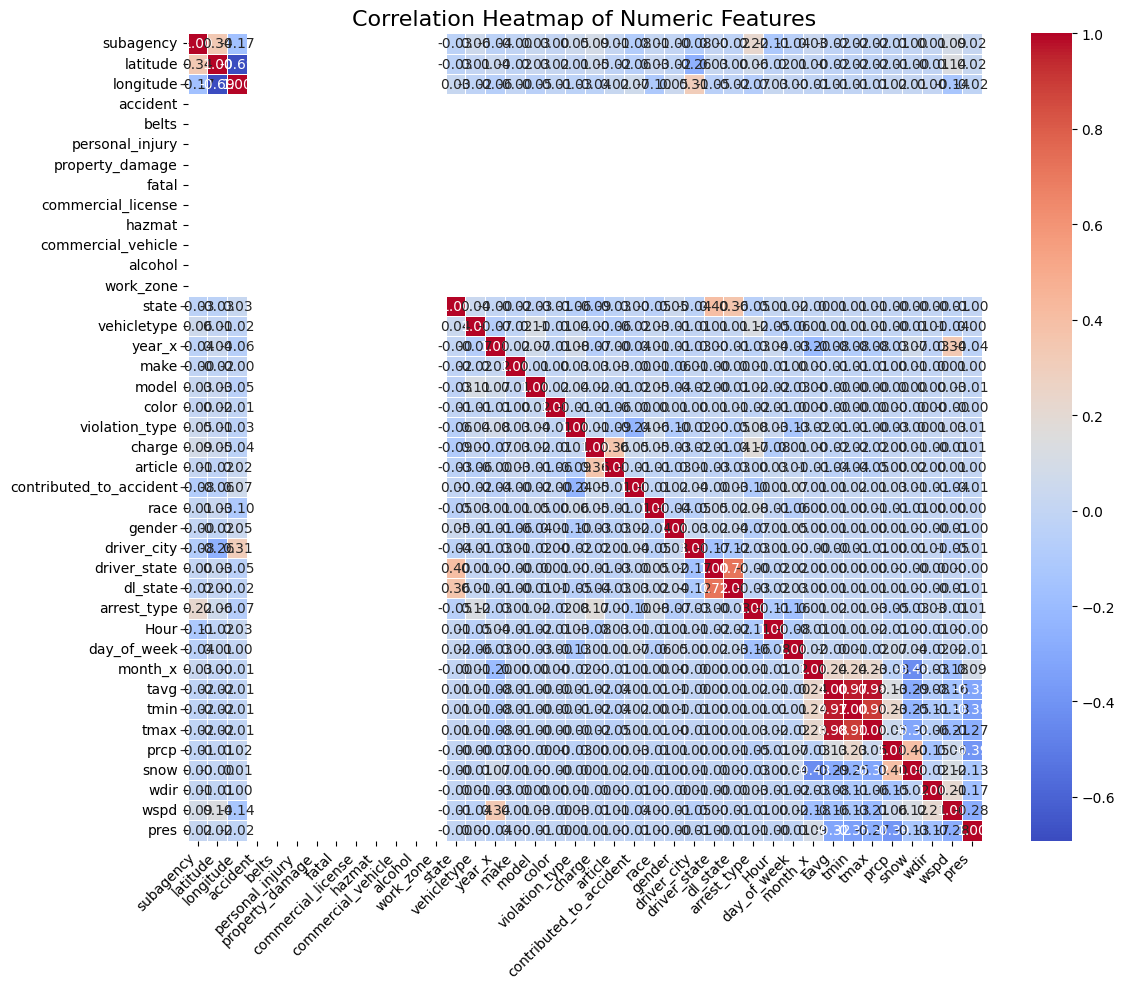

In [ ]:
# Filter numeric columns
numeric_df = encoded_df.select_dtypes(include=['number'])

#  Compute correlation matrix
correlation_matrix = numeric_df.corr()

#  Plot heatmap
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Applying Clustering

We are using clustering in this case because we have a big number of records. By grouping the data, we can minimize its size and allow the model to learn in depth.  


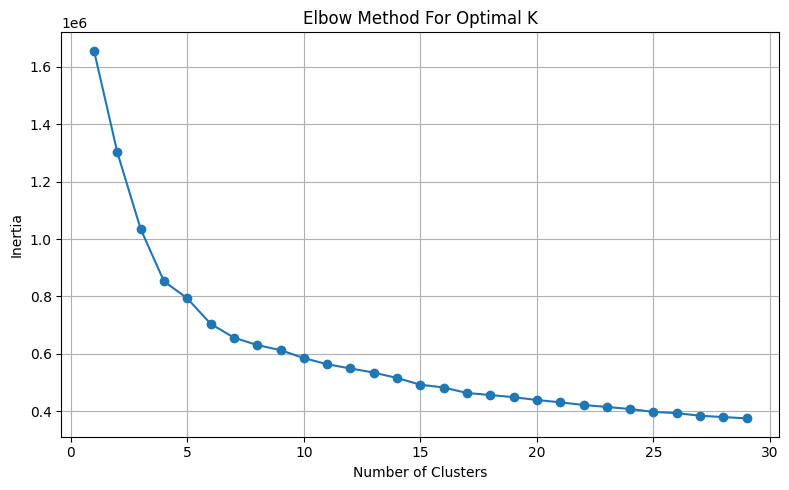

In [ ]:
# using KMeans for Clustering
from sklearn.cluster import KMeans

# Selecting relevant features
features = [
    'violation_type',     # Already encoded
    'Hour', 'day_of_week', 'month_x',
    'tavg', 'prcp', 'snow', 'wspd',
    'accident', 'alcohol', 'work_zone'
]

# Subset the scaled data
X_cluster = encoded_df[features]

#  Plot Elbow Curve to determine optimal number of clusters
inertia = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

#  Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

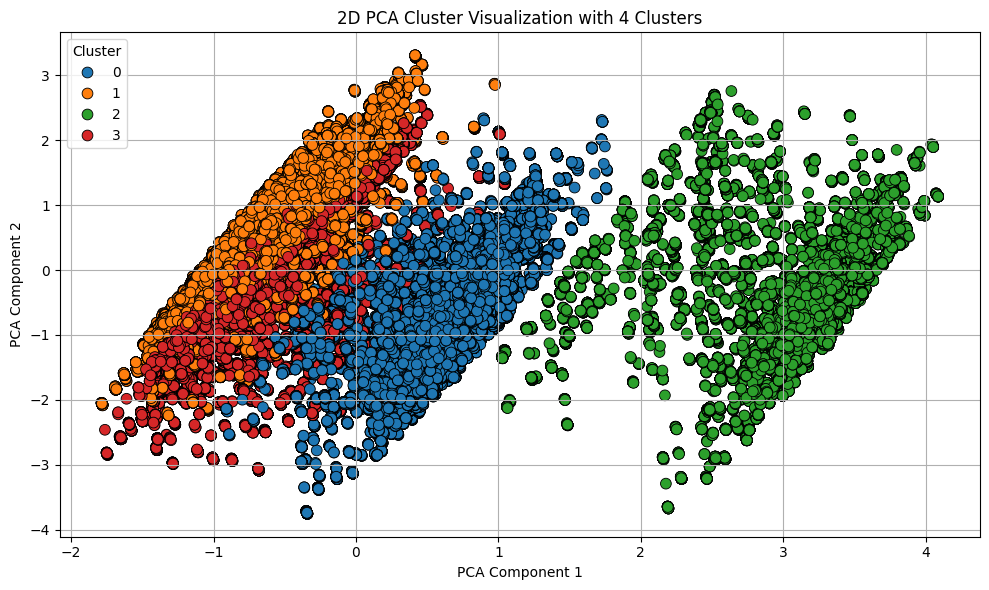

In [ ]:
# Visulize the Clusters
from sklearn.decomposition import PCA
import seaborn as sns

# Clustering with optimal k
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
encoded_df['Cluster'] = kmeans_final.fit_predict(X_cluster)

#  Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

#  Fit KMeans (if not already done)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_cluster)

#  Create PCA scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', s=60, edgecolor='k')
plt.title(f'2D PCA Cluster Visualization with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()



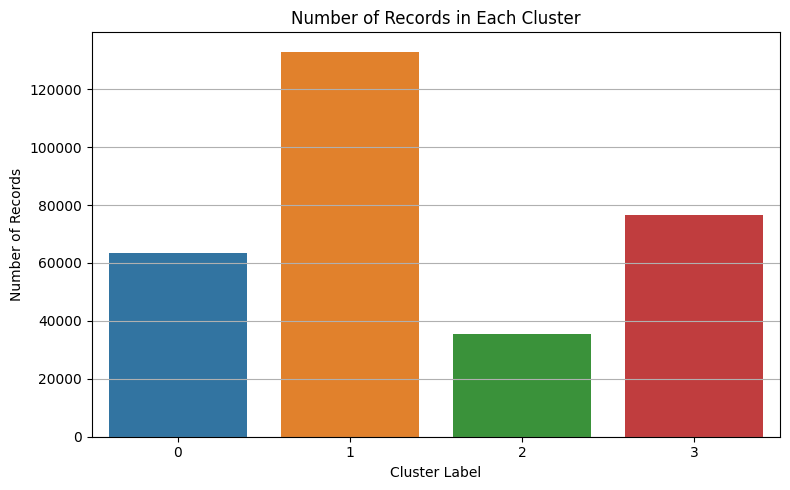

In [ ]:
# Visulize the Clusters
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')
plt.title('Number of Records in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


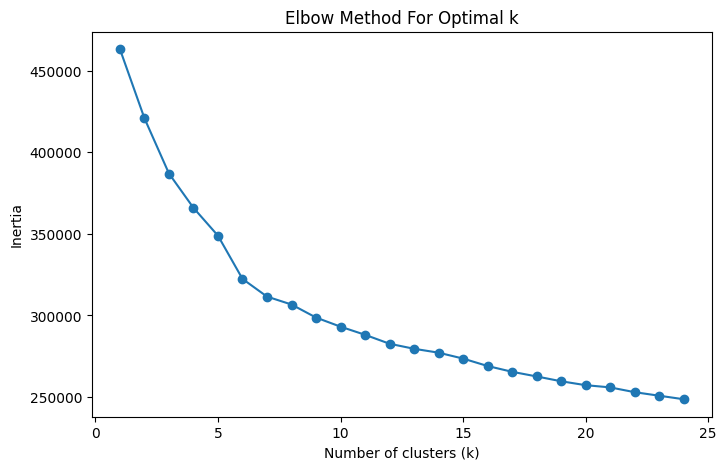

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


# Step 1: Select useful features
clustering_features = [
    'subagency', 'Hour', 'day_of_week', 'month_x',
    'vehicletype', 'make', 'model', 'year_x', 'color',
    'tavg','prcp', 'snow', 'wdir', 'wspd', 'pres',
    'accident', 'belts', 'personal_injury', 'property_damage', 'fatal',
    'alcohol', 'commercial_vehicle', 'work_zone'
]

#  Subset the dataframe
X_cluster = encoded_df[clustering_features]

# Sampling to speed up processing
sample_frac = 0.1  # 10% sample; adjust as needed
X_sampled = X_cluster.sample(frac=sample_frac, random_state=42)

# Scale data (important because features have different units/scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

#  Plot Elbow Curve
inertia = []
k_range = range(1, 25)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.110


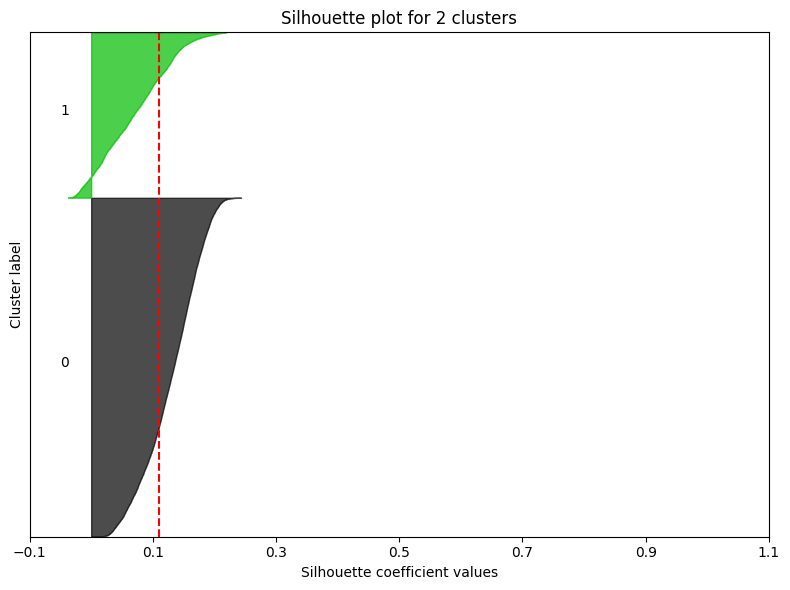

For n_clusters = 3, the average silhouette_score is : 0.097


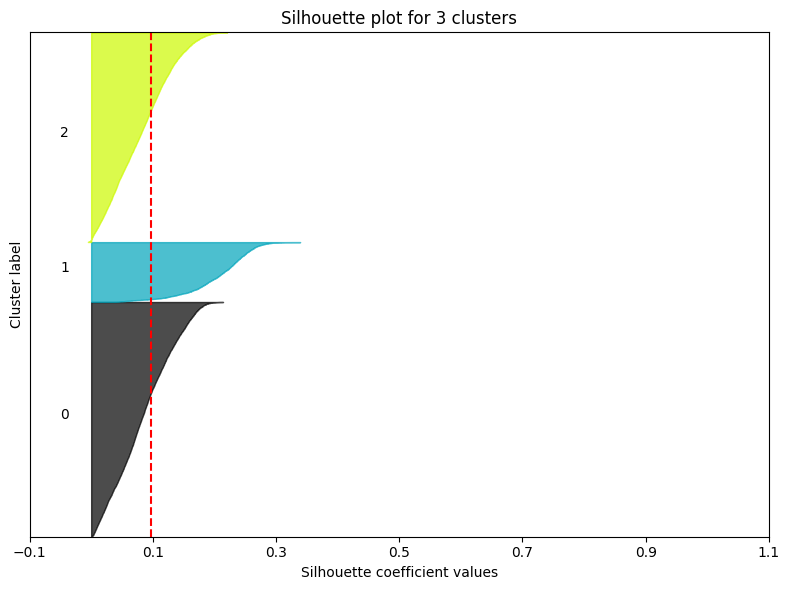

For n_clusters = 4, the average silhouette_score is : 0.092


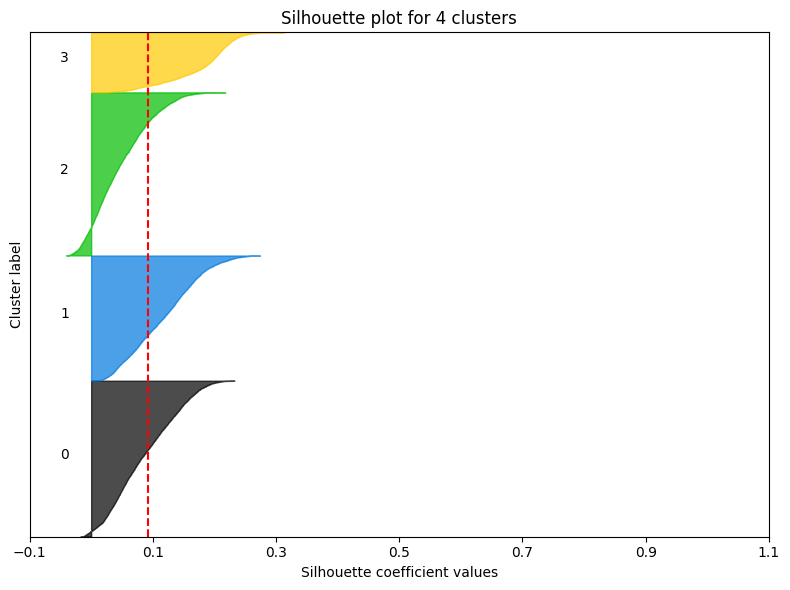

For n_clusters = 5, the average silhouette_score is : 0.098


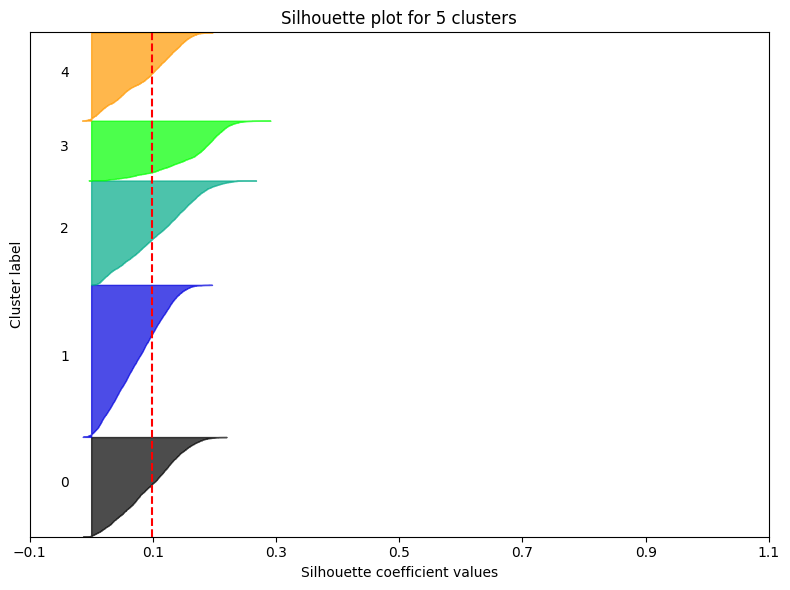

For n_clusters = 6, the average silhouette_score is : 0.106


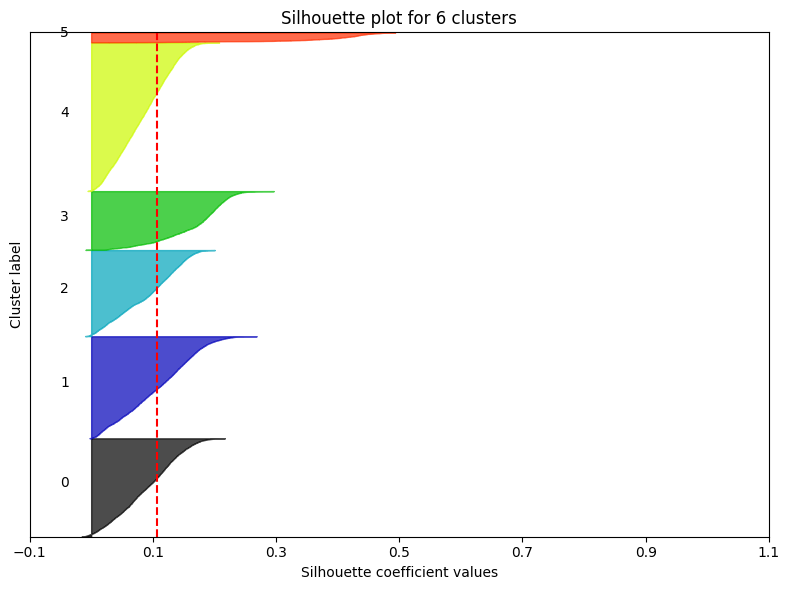

For n_clusters = 7, the average silhouette_score is : 0.102


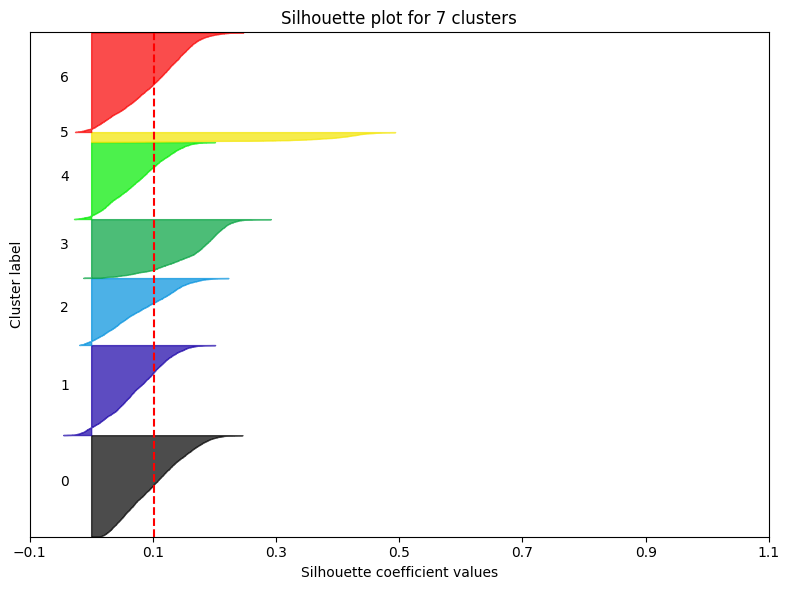

For n_clusters = 8, the average silhouette_score is : 0.090


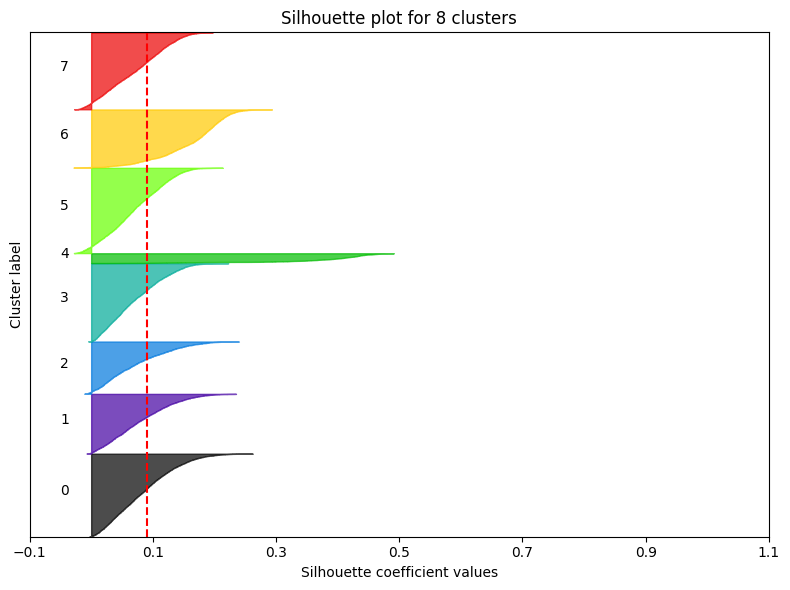

For n_clusters = 9, the average silhouette_score is : 0.095


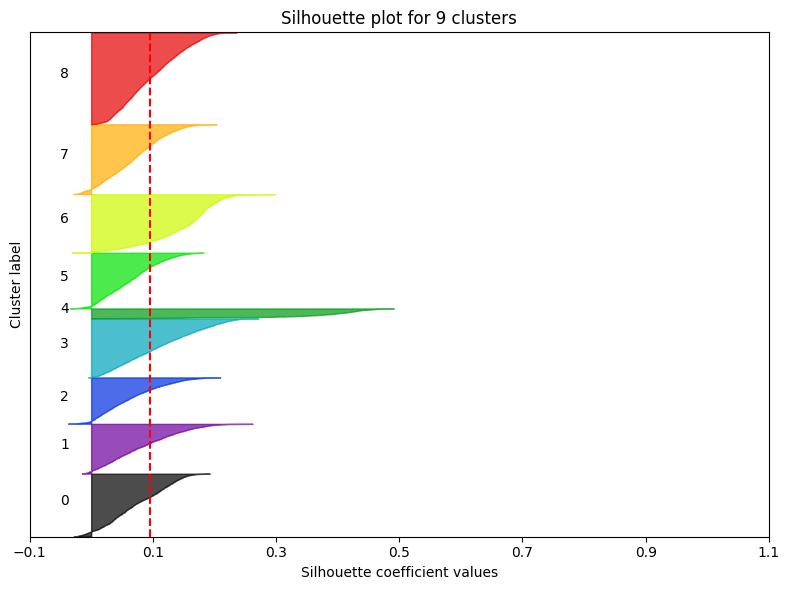

For n_clusters = 10, the average silhouette_score is : 0.088


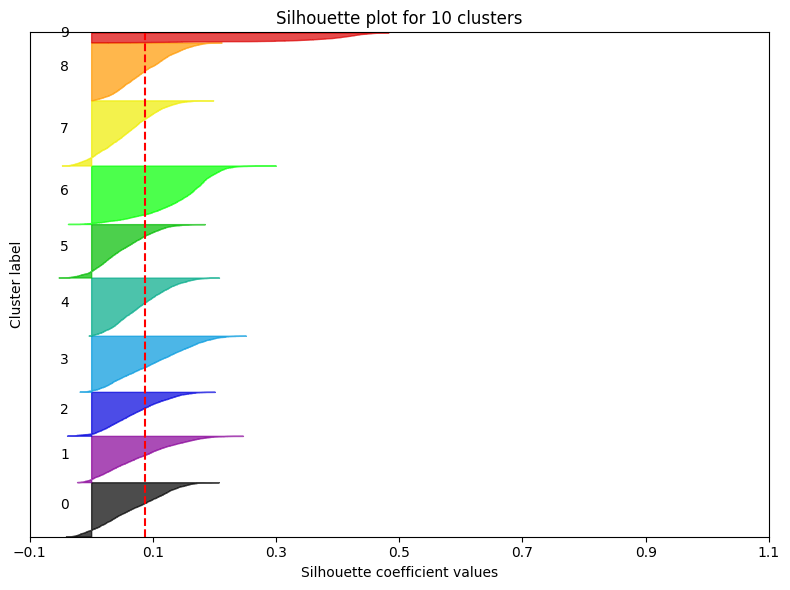

For n_clusters = 11, the average silhouette_score is : 0.087


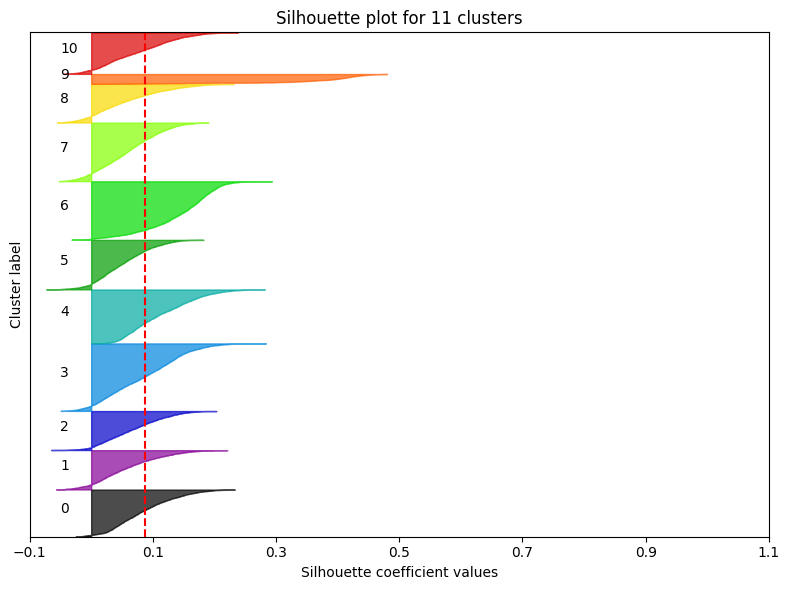

For n_clusters = 12, the average silhouette_score is : 0.085


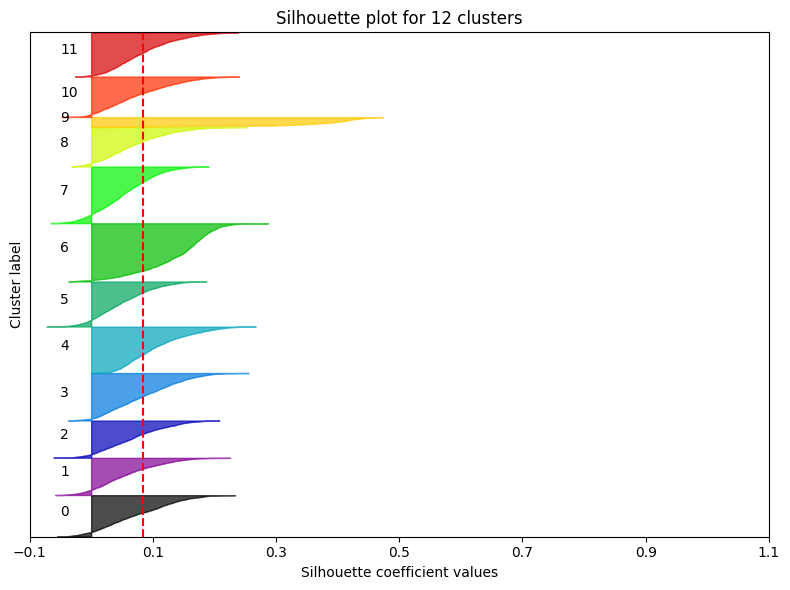

For n_clusters = 13, the average silhouette_score is : 0.083


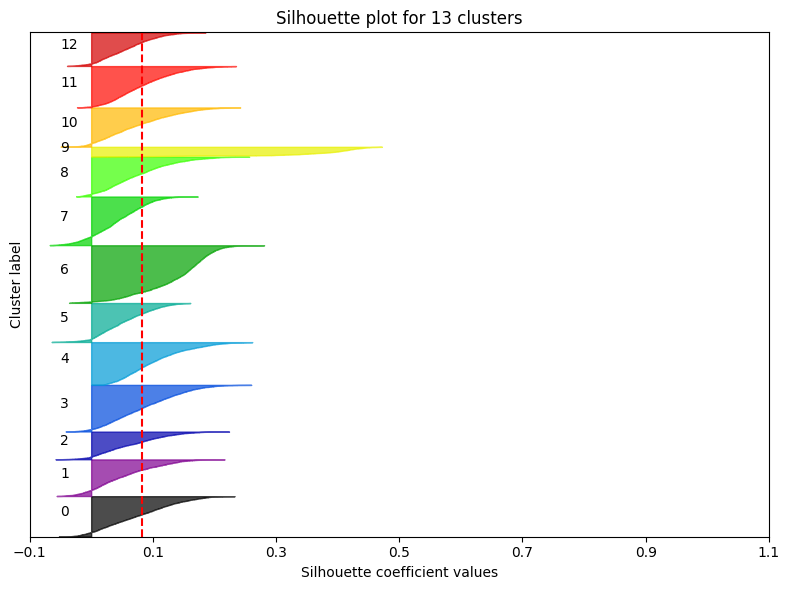

For n_clusters = 14, the average silhouette_score is : 0.082


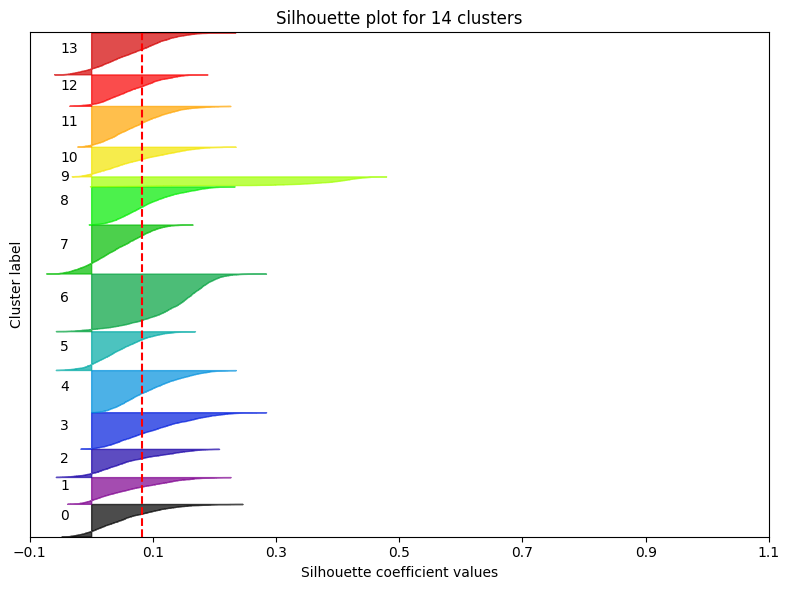

For n_clusters = 15, the average silhouette_score is : 0.084


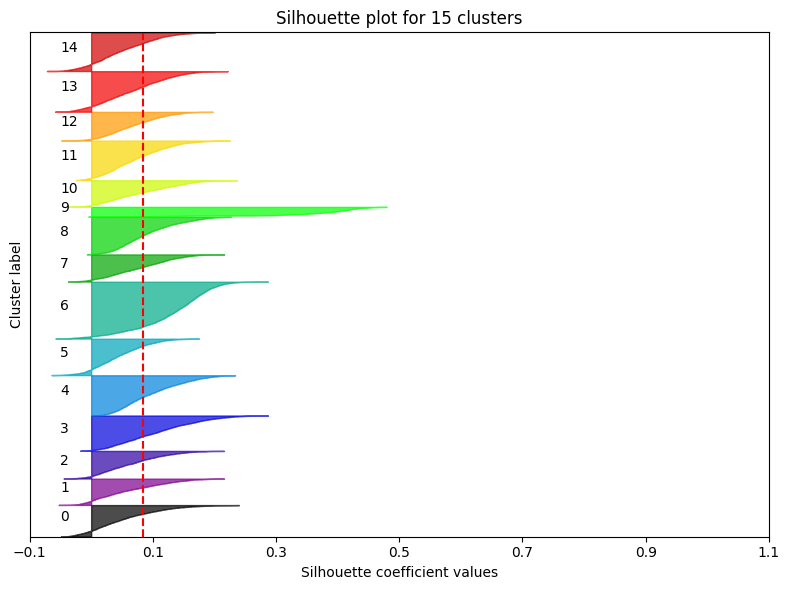

For n_clusters = 16, the average silhouette_score is : 0.081


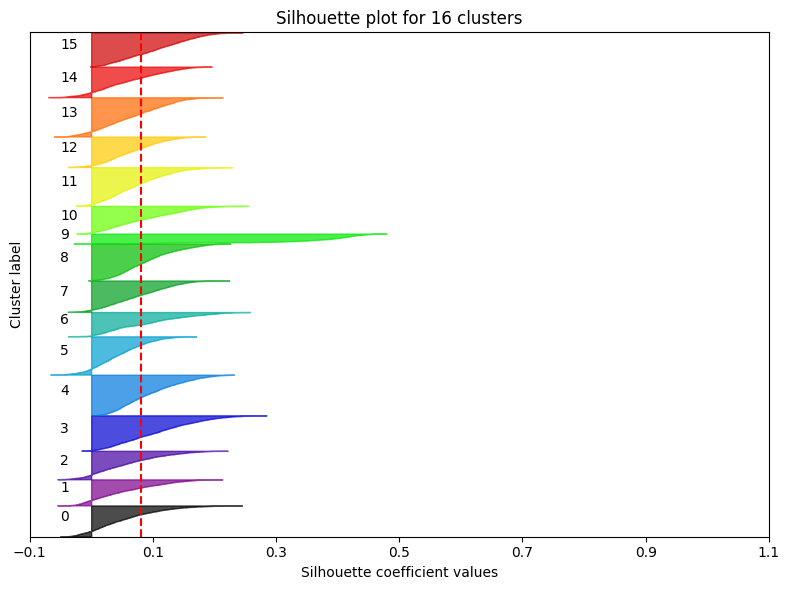

For n_clusters = 17, the average silhouette_score is : 0.079


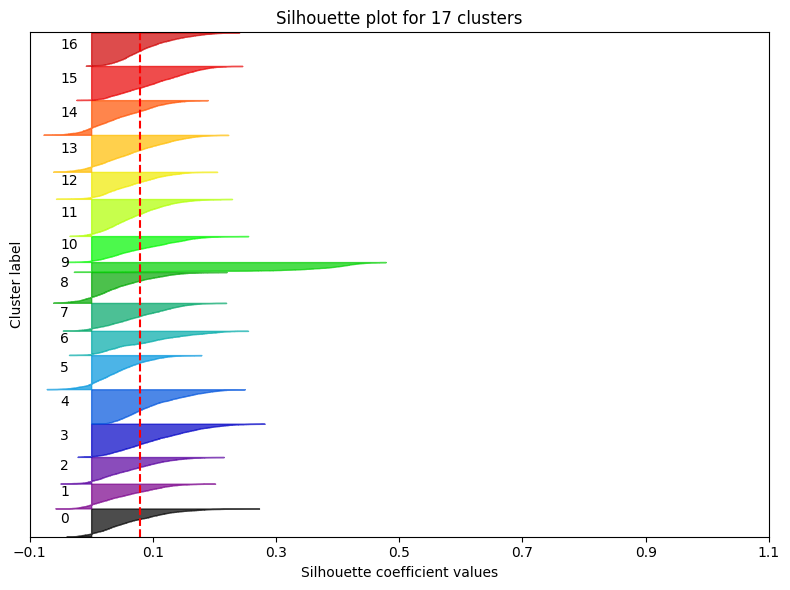

For n_clusters = 18, the average silhouette_score is : 0.080


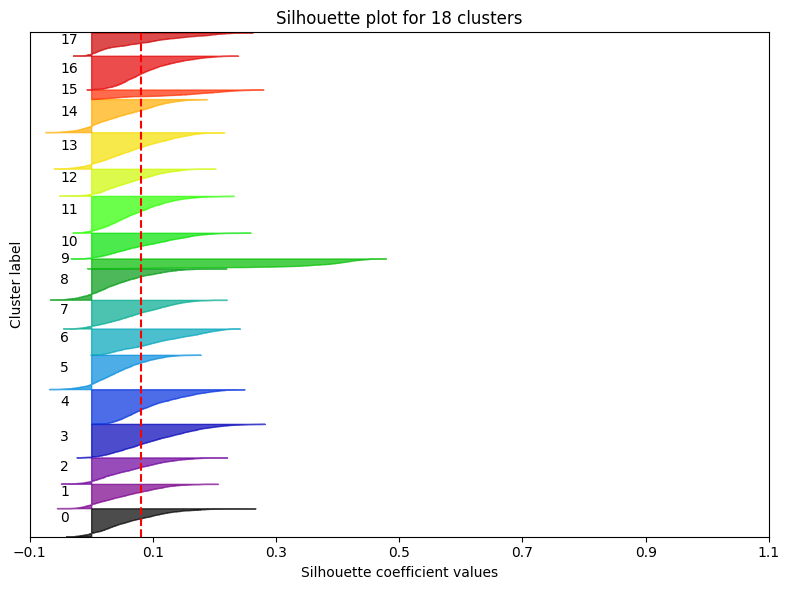

For n_clusters = 19, the average silhouette_score is : 0.081


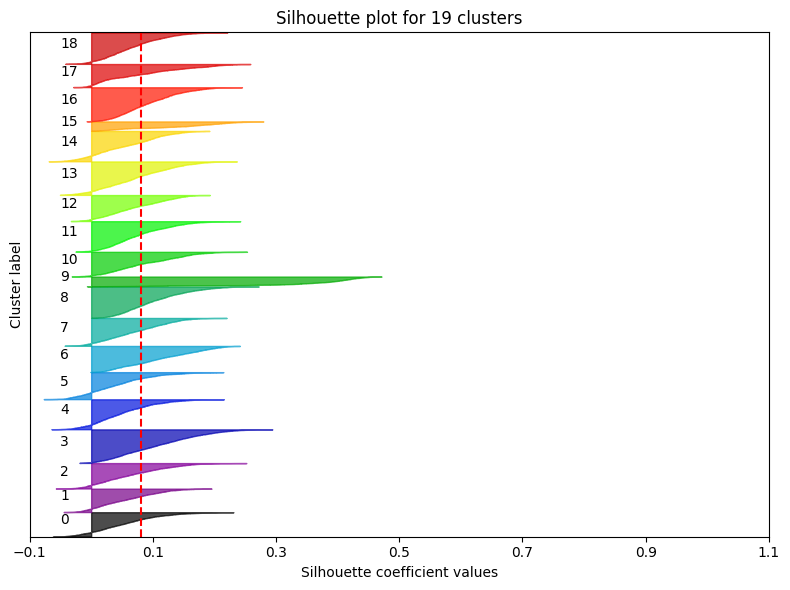

For n_clusters = 20, the average silhouette_score is : 0.079


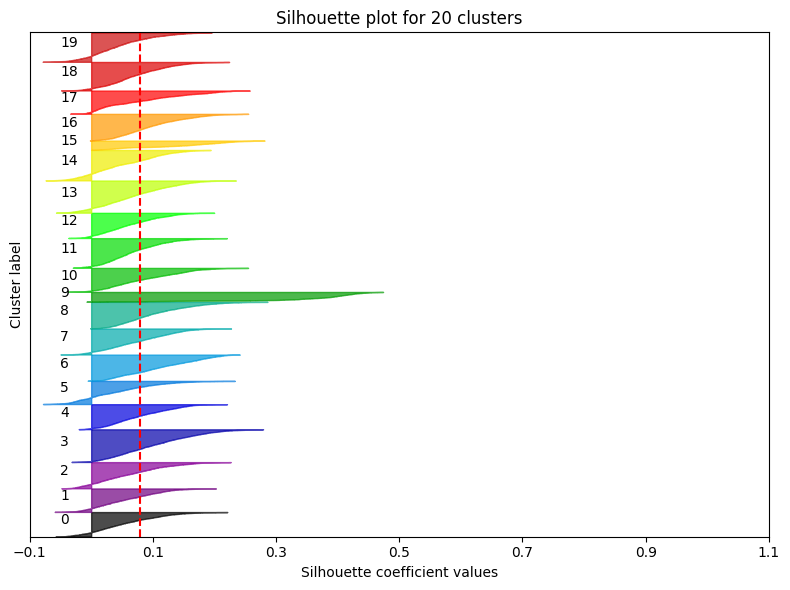

For n_clusters = 21, the average silhouette_score is : 0.079


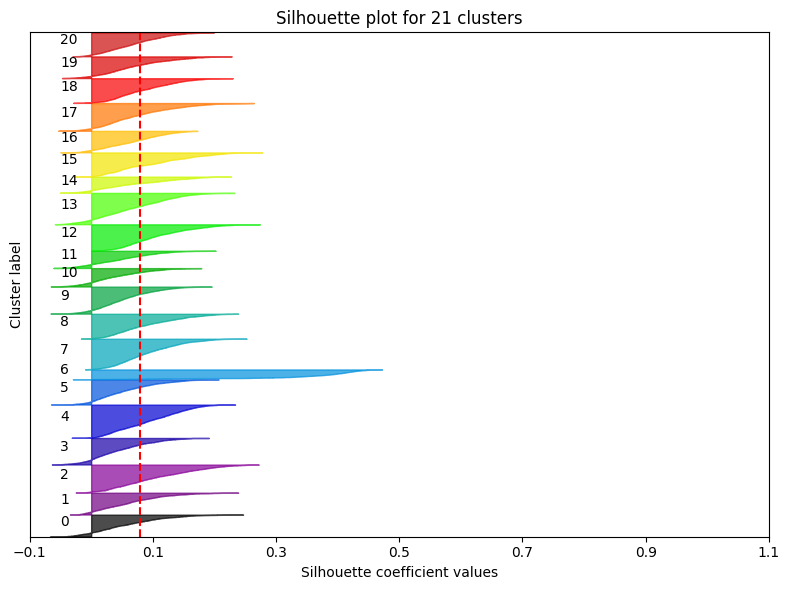

For n_clusters = 22, the average silhouette_score is : 0.080


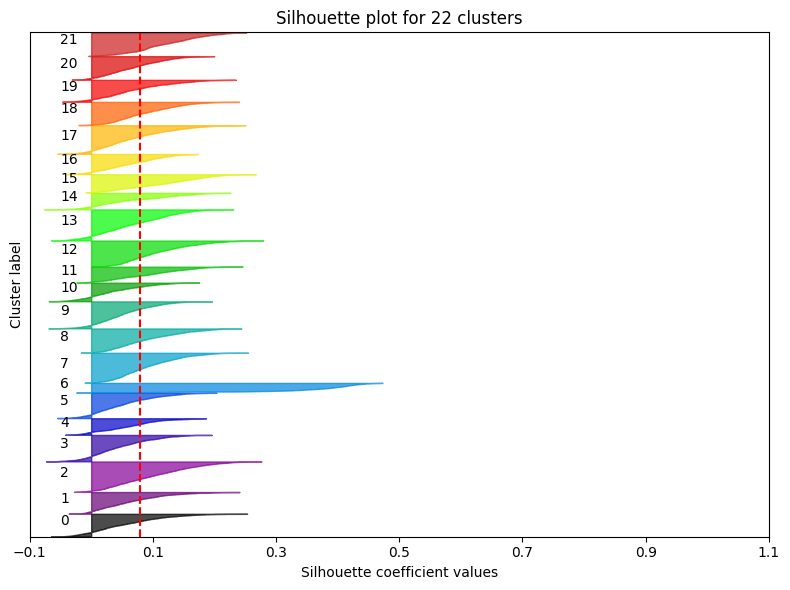

For n_clusters = 23, the average silhouette_score is : 0.080


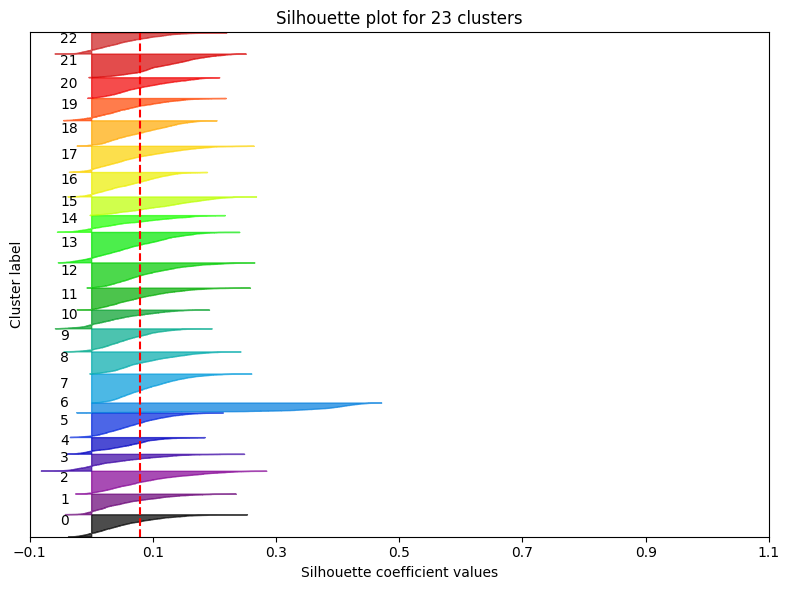

For n_clusters = 24, the average silhouette_score is : 0.080


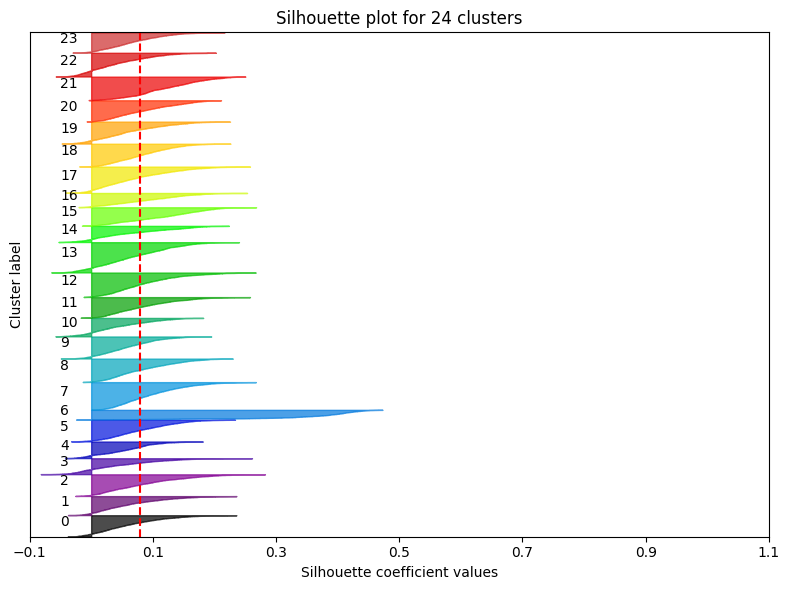

In [ ]:
#  Silhouette analysis
range_n_clusters = range(2,25)

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.tight_layout()
    plt.show()


 Extracting Edge Index and Edge type using knn_graph

In [ ]:
import torch
from torch_geometric.nn import knn_graph
from sklearn.preprocessing import StandardScaler

#  Define the relevant clustering features
clustering_features = [
    'subagency', 'Hour', 'day_of_week', 'month_x',
    'vehicletype', 'make', 'model', 'year_x', 'color',
    'tavg','prcp', 'snow', 'wdir', 'wspd', 'pres',
    'accident', 'belts', 'personal_injury', 'property_damage', 'fatal',
    'alcohol', 'commercial_vehicle', 'work_zone'
]

#  Subset encoded_df and scale

X_cluster = encoded_df[clustering_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

#  Convert to PyTorch tensor
x = torch.tensor(X_scaled, dtype=torch.float)

#  Build k-NN graph (e.g., k = 5)
edge_index = knn_graph(x, k=5, loop=False)

#  Print shape or preview edge_index
print("edge_index shape:", edge_index.shape)
print("edge_index:", edge_index[:, :10])  # Preview first 10 edges


edge_index shape: torch.Size([2, 1555109])
edge_index: tensor([[ 1022,   639,  1021,   838,   624,     2,   107,   108,   109, 14982],
        [    0,     0,     0,     0,     0,     1,     1,     1,     1,     1]])


In [ ]:
import torch
from torch_geometric.nn import knn_graph
from sklearn.preprocessing import StandardScaler

# Step 1: Define the relevant clustering features
clustering_features = [
    'subagency', 'Hour', 'day_of_week', 'month_x',
    'vehicletype', 'make', 'model', 'year_x', 'color',
    'tavg','prcp', 'snow', 'wdir', 'wspd', 'pres',
    'accident', 'belts', 'personal_injury', 'property_damage', 'fatal',
    'alcohol', 'commercial_vehicle', 'work_zone'
]

# Step 2: Subset encoded_df and scale

X_cluster = encoded_df[clustering_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Step 3: Convert to PyTorch tensor
x = torch.tensor(X_scaled, dtype=torch.float)

# Step 4: Build k-NN graph (e.g., k = 12)
edge_index = knn_graph(x, k=12, loop=False)

# Optional: Print shape or preview edge_index
print("edge_index shape:", edge_index.shape)
print("edge_index:", edge_index[:, :10])  # Preview first 10 edges


edge_index shape: torch.Size([2, 3705879])
edge_index: tensor([[1022,  639, 1021,  838,  624,  230,  625,  158,  834, 1755],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])


## **Implement a validation split and track metrics at each epoch; introduce early stopping**

In [ ]:
import random
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from torch_geometric.data import Data
import torch
import torch.nn.functional as F
from torch_geometric.nn import RGCNConv, knn_graph
from sklearn.metrics import accuracy_score

In [ ]:

# --- Set seed for reproducibility ---
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [ ]:
# --- Prepare features and labels ---
clustering_features = [
    'subagency', 'Hour', 'day_of_week', 'month_x',
    'vehicletype', 'make', 'model', 'year_x', 'color',
    'tavg','prcp', 'snow', 'wdir', 'wspd', 'pres',
    'accident', 'belts', 'personal_injury', 'property_damage', 'fatal',
    'alcohol', 'commercial_vehicle', 'work_zone'
]

X = encoded_df[clustering_features]
y = encoded_df['violation_type']

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**By Balancing Data**

In [ ]:
# Balance the dataset
ros = RandomOverSampler(random_state=SEED)
X_balanced, y_balanced = ros.fit_resample(X_scaled, y_encoded)

In [ ]:
# Convert to torch tensor (balanced data)
x = torch.tensor(X_balanced, dtype=torch.float)
y_tensor = torch.tensor(y_balanced, dtype=torch.long)

In [ ]:
# Build k-NN graph on balanced data
edge_index = knn_graph(x, k=12, loop=False)
edge_type = torch.zeros(edge_index.size(1), dtype=torch.long)

In [ ]:
# --- Train/Val/Test split ---
indices = np.arange(len(y_tensor))
# 20% test, 80% train+val
train_val_idx, test_idx = train_test_split(
    indices, test_size=0.2, stratify=y_tensor, random_state=SEED
)
# 75% of train_val → train, 25% → val  => overall: 60% train, 20% val, 20% test
train_idx, val_idx = train_test_split(
    train_val_idx, test_size=0.25, stratify=y_tensor[train_val_idx], random_state=SEED
)

In [ ]:
# Masks
train_mask = torch.zeros(len(y_tensor), dtype=torch.bool)
val_mask   = torch.zeros(len(y_tensor), dtype=torch.bool)
test_mask  = torch.zeros(len(y_tensor), dtype=torch.bool)
train_mask[train_idx] = True
val_mask[ val_idx  ] = True
test_mask[test_idx ] = True

data = Data(
    x=x,
    edge_index=edge_index,
    edge_type=edge_type,
    y=y_tensor,
    train_mask=train_mask,
    val_mask=val_mask,
    test_mask=test_mask
)

In [ ]:
#  Define R-GCN model
class RGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_relations):
        super().__init__()
        self.conv1 = RGCNConv(in_channels, hidden_channels, num_relations)
        self.conv2 = RGCNConv(hidden_channels, out_channels, num_relations)

    def forward(self, x, edge_index, edge_type):
        x = F.relu(self.conv1(x, edge_index, edge_type))
        x = self.conv2(x, edge_index, edge_type)
        return x

#  Initialize model
model = RGCN(
    in_channels=x.shape[1],
    hidden_channels=64,
    out_channels=len(label_encoder.classes_),
    num_relations=1
).to(x.device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

#  Evaluation helper
def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_type)
        loss = criterion(out[mask], data.y[mask]).item()
        pred = out[mask].argmax(dim=1)
        acc = accuracy_score(data.y[mask].cpu(), pred.cpu())
    return acc, loss

conv1: This is the first hidden layer.
➤ It transforms the input features (of size in_channels) into a hidden representation (hidden_channels).

conv2: This is the output layer, not a hidden layer.
➤ It takes the hidden representation and produces the final output (with out_channels, e.g., number of classes).



In [ ]:
#  Training loop with early stopping
best_val_acc = 0.0
patience, patience_counter = 20, 0
best_state = None
best_epoch = 0

for epoch in range(1, 301):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_type)
    train_step_loss = criterion(out[data.train_mask], data.y[data.train_mask])
    train_step_loss.backward()
    optimizer.step()

    train_acc, train_eval_loss = evaluate(data.train_mask)
    val_acc, val_loss = evaluate(data.val_mask)

    print(f"Epoch {epoch:03d} | "
          f"Train Step Loss: {train_step_loss:.4f} | "
          f"Train Eval Loss: {train_eval_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_state = model.state_dict()
        best_epoch = epoch
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}. Best val_acc={best_val_acc:.4f} at epoch {best_epoch}")
            break

#  Restore best model state
if best_state is not None:
    model.load_state_dict(best_state)
    print(f"Model restored to best epoch {best_epoch} with val_acc={best_val_acc:.4f}")

#  Evaluate on test set
if hasattr(data, 'test_mask'):
    test_acc, test_loss = evaluate(data.test_mask)
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

Epoch 001 | Train Step Loss: 1.4469 | Train Eval Loss: 1.2193, Acc: 0.3506 | Val Loss: 1.2198, Acc: 0.3497
Epoch 002 | Train Step Loss: 1.2193 | Train Eval Loss: 1.2047, Acc: 0.3578 | Val Loss: 1.2065, Acc: 0.3567
Epoch 003 | Train Step Loss: 1.2047 | Train Eval Loss: 1.1765, Acc: 0.3611 | Val Loss: 1.1781, Acc: 0.3603
Epoch 004 | Train Step Loss: 1.1765 | Train Eval Loss: 1.1433, Acc: 0.3688 | Val Loss: 1.1439, Acc: 0.3696
Epoch 005 | Train Step Loss: 1.1433 | Train Eval Loss: 1.1347, Acc: 0.3743 | Val Loss: 1.1341, Acc: 0.3745
Epoch 006 | Train Step Loss: 1.1347 | Train Eval Loss: 1.1413, Acc: 0.3774 | Val Loss: 1.1400, Acc: 0.3775
Epoch 007 | Train Step Loss: 1.1413 | Train Eval Loss: 1.1412, Acc: 0.3776 | Val Loss: 1.1400, Acc: 0.3768
Epoch 008 | Train Step Loss: 1.1412 | Train Eval Loss: 1.1272, Acc: 0.3822 | Val Loss: 1.1265, Acc: 0.3812
Epoch 009 | Train Step Loss: 1.1272 | Train Eval Loss: 1.1081, Acc: 0.3911 | Val Loss: 1.1081, Acc: 0.3897
Epoch 010 | Train Step Loss: 1.1081 |

In [ ]:
#  Save full model (architecture + weights)
torch.save(model.state_dict(), '/content/drive/MyDrive/Group_project/best_rgcn_full_model.pth')
print("✅ Full model (architecture + weights) saved to 'rgcn_full_model.pth'")


✅ Full model (architecture + weights) saved to 'rgcn_full_model.pth'


In [ ]:
print(model)

RGCN(
  (conv1): RGCNConv(23, 64, num_relations=1)
  (conv2): RGCNConv(64, 3, num_relations=1)
)


# **Hyperparameter Tuning**

In [ ]:
import optuna
import torch
import torch.nn.functional as F
from torch_geometric.nn import RGCNConv
from sklearn.metrics import accuracy_score
import os

In [ ]:
#  Fix random seeds
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

SEED = 42
set_seed(SEED)

In [ ]:
#  Define R-GCN model with dropout
class RGCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_relations, dropout=0.0):
        super().__init__()
        self.conv1 = RGCNConv(in_channels, hidden_channels, num_relations)
        self.conv2 = RGCNConv(hidden_channels, out_channels, num_relations)
        self.dropout = dropout

    def forward(self, x, edge_index, edge_type):
        x = F.relu(self.conv1(x, edge_index, edge_type))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index, edge_type)
        return x

In [ ]:
#  Objective function
def objective(trial):
    hidden_channels = trial.suggest_int("hidden_channels", 32, 128)
    dropout = trial.suggest_float("dropout", 0.0, 0.5)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    weight_decay = trial.suggest_loguniform("weight_decay", 1e-6, 1e-2)

    model = RGCN(
        in_channels=data.x.shape[1],
        hidden_channels=hidden_channels,
        out_channels=len(label_encoder.classes_),
        num_relations=1,
        dropout=dropout
    ).to(data.x.device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    best_val_acc, patience_counter = 0.0, 0
    patience = 10

    for epoch in range(1, 101):
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.edge_type)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_out = model(data.x, data.edge_index, data.edge_type)
            val_pred = val_out[data.val_mask].argmax(dim=1)
            val_acc = accuracy_score(data.y[data.val_mask].cpu(), val_pred.cpu())

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    return best_val_acc

In [ ]:
#  Run Optuna study
if __name__ == "__main__":
    study = optuna.create_study(direction="maximize",
                                sampler=optuna.samplers.TPESampler(),
                                pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
    study.optimize(objective, n_trials=50, timeout=3600)

    print("Best trial:")
    print(f"  Value: {study.best_trial.value:.4f}")
    for key, val in study.best_trial.params.items():
        print(f"    {key}: {val}")

#  Evaluate on test set using best trial params
best_params = study.best_trial.params

best_model = RGCN(
    in_channels=data.x.shape[1],
    hidden_channels=best_params['hidden_channels'],
    out_channels=len(label_encoder.classes_),
    num_relations=1,
    dropout=best_params['dropout']
).to(data.x.device)

best_optimizer = torch.optim.Adam(
    best_model.parameters(),
    lr=best_params['lr'],
    weight_decay=best_params['weight_decay']
)

criterion = torch.nn.CrossEntropyLoss()

# Train on train + val
for epoch in range(1, 251):
    best_model.train()
    best_optimizer.zero_grad()
    out = best_model(data.x, data.edge_index, data.edge_type)
    mask = data.train_mask | data.val_mask
    loss = criterion(out[mask], data.y[mask])
    loss.backward()
    best_optimizer.step()

# Test evaluation
best_model.eval()
with torch.no_grad():
    out = best_model(data.x, data.edge_index, data.edge_type)
    test_pred = out[data.test_mask].argmax(dim=1)
    test_acc = accuracy_score(data.y[data.test_mask].cpu(), test_pred.cpu())

print(f"✅ Test Accuracy with best trial: {test_acc:.4f}")

# Save the full model (architecture + weights)
model_path = "best_rgcn_full_model.pt"
torch.save(best_model, model_path)
print(f"✅ Best model saved to '{model_path}'")

# Trigger download in Colab
try:
    from google.colab import files
    if os.path.exists(model_path):
        files.download(model_path)
except ImportError:
    pass  # Not in Colab

#  Load for inference
best_model_loaded = torch.load("best_rgcn_full_model.pt")
best_model_loaded.eval()

[I 2025-05-24 06:55:58,674] A new study created in memory with name: no-name-10ade414-1647-4f0b-92a4-86c886902c62
[I 2025-05-24 08:11:25,671] Trial 0 finished with value: 0.6935825446620796 and parameters: {'lr': 0.008046007614361078, 'weight_decay': 0.002466029258522838, 'hidden_channels': 64, 'dropout': 0.1224459882666428, 'k': 10}. Best is trial 0 with value: 0.6935825446620796.


Best trial:
  Value: 0.6936
  Params:
    lr: 0.008046007614361078
    weight_decay: 0.002466029258522838
    hidden_channels: 64
    dropout: 0.1224459882666428
    k: 10
Test Accuracy with best trial: 0.6985


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RGCN(
  (convs): ModuleList(
    (0): RGCNConv(23, 64, num_relations=1)
    (1): RGCNConv(64, 64, num_relations=1)
    (2): RGCNConv(64, 3, num_relations=1)
  )
)

**HGT Model**

In [ ]:

# Selecting  clustering features

clustering_features = [
    'subagency', 'Hour', 'day_of_week', 'month_x',
    'vehicletype', 'make', 'model', 'year_x', 'color',
    'tavg','prcp', 'snow', 'wdir', 'wspd', 'pres',
    'accident', 'belts', 'personal_injury', 'property_damage', 'fatal',
    'alcohol', 'commercial_vehicle', 'work_zone'
]


#  Feature separation

event_features = encoded_df[['Latitude', 'Longitude', 'Hour', 'Day of Week', 'Month_x']].values
vehicle_features = encoded_df[['VehicleType', 'Make', 'Model', 'Year_x', 'Color']].values
context_features = encoded_df[['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres',
                               'Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal',
                               'Alcohol', 'Commercial Vehicle', 'Work Zone']].values
cluster_features = encoded_df[clustering_features].values

#  Encode target labels

label_encoder = LabelEncoder()
y_np = label_encoder.fit_transform(encoded_df['Violation Type'])


# Compute class weights

classes = np.unique(y_np)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_np)
class_weights = torch.tensor(class_weights, dtype=torch.float)


#  Train-test split

SEED = 42
train_idx, test_idx = train_test_split(
    np.arange(len(y_np)), test_size=0.2, stratify=y_np, random_state=SEED
)


#  Scale features

scaler_event = RobustScaler()
scaler_vehicle = RobustScaler()
scaler_context = RobustScaler()
scaler_cluster = RobustScaler()

event_scaled = scaler_event.fit_transform(event_features)
vehicle_scaled = scaler_vehicle.fit_transform(vehicle_features)
context_scaled = scaler_context.fit_transform(context_features)
cluster_scaled = scaler_cluster.fit_transform(cluster_features)


# Convert to PyTorch tensors

event_x = torch.tensor(event_scaled, dtype=torch.float)
vehicle_x = torch.tensor(vehicle_scaled, dtype=torch.float)
context_x = torch.tensor(context_scaled, dtype=torch.float)
clustering_x = torch.tensor(cluster_scaled, dtype=torch.float)
y = torch.tensor(y_np, dtype=torch.long)


In [ ]:

#  Build k-NN Edge Indices

def build_knn_edges(source_feats, target_feats, k):

    nn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    nn.fit(target_feats)
    _, indices = nn.kneighbors(source_feats)

    src_indices = np.repeat(np.arange(len(source_feats)), k)
    tgt_indices = indices.flatten()

    edge_index = torch.tensor([src_indices, tgt_indices], dtype=torch.long)
    return edge_index


In [ ]:

#  Construct HeteroData Graph

data = HeteroData()

# Assign node features
data['event'].x   = event_x
data['vehicle'].x = vehicle_x
data['context'].x = context_x

# Assign labels to 'event' node type
data['event'].y = y

# Set graph parameters
N = len(y)
k = 5

# k-NN: Connect event → vehicle nodes
data['event', 'linked_to', 'vehicle'].edge_index = build_knn_edges(event_x.numpy(), vehicle_x.numpy(), k)

# One-to-one mapping: vehicle → context
data['vehicle', 'described_by', 'context'].edge_index = torch.stack([
    torch.arange(N, dtype=torch.long),
    torch.arange(N, dtype=torch.long)
], dim=0)

# One-to-one mapping: context → event
data['context', 'affects', 'event'].edge_index = torch.stack([
    torch.arange(N, dtype=torch.long),
    torch.arange(N, dtype=torch.long)
], dim=0)

# Define train/test masks
data['event'].train_mask = torch.zeros(N, dtype=torch.bool)
data['event'].train_mask[train_idx] = True

data['event'].test_mask = torch.zeros(N, dtype=torch.bool)
data['event'].test_mask[test_idx] = True


In [ ]:

#  Define HGT Model

class HGT(torch.nn.Module):
    def __init__(self, metadata, in_channels_dict, hidden_channels, out_channels, num_heads=2, num_layers=2):
        super().__init__()
        self.lin_dict = torch.nn.ModuleDict()
        for node_type, in_channels in in_channels_dict.items():
            self.lin_dict[node_type] = Linear(in_channels, hidden_channels)

        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv = HGTConv(hidden_channels, hidden_channels, metadata, heads=num_heads)
            self.convs.append(conv)

        self.classifier = Linear(hidden_channels, out_channels)

    def forward(self, x_dict, edge_index_dict):
        # Apply initial linear transformations
        x_dict = {
            node_type: self.lin_dict[node_type](x)
            for node_type, x in x_dict.items()
        }
        # Pass through HGT layers
        for conv in self.convs:
            x_dict = conv(x_dict, edge_index_dict)
        return self.classifier(x_dict['event'])


In [ ]:

# Step 5: Train/Test Pipeline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

# Define model
in_channels_dict = {
    'event': data['event'].x.shape[1],
    'vehicle': data['vehicle'].x.shape[1],
    'context': data['context'].x.shape[1]
}

model = HGT(
    metadata=data.metadata(),
    in_channels_dict=in_channels_dict,
    hidden_channels=64,
    out_channels=len(torch.unique(y))
).to(device)

# Optimizer and weighted loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))

# Training function
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x_dict, data.edge_index_dict)
    loss = criterion(out[data['event'].train_mask], data['event'].y[data['event'].train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Evaluation function
@torch.no_grad()
def test():
    model.eval()
    out = model(data.x_dict, data.edge_index_dict)
    pred = out.argmax(dim=1)
    train_correct = pred[data['event'].train_mask] == data['event'].y[data['event'].train_mask]
    test_correct = pred[data['event'].test_mask] == data['event'].y[data['event'].test_mask]
    train_acc = int(train_correct.sum()) / int(data['event'].train_mask.sum())
    test_acc = int(test_correct.sum()) / int(data['event'].test_mask.sum())
    return train_acc, test_acc


In [ ]:

# Running Training Loop

patience = 20
best_test_acc = 0
counter = 0

for epoch in range(1, 251):
    loss = train()
    train_acc, test_acc = test()

    print(f"Epoch {epoch:03d} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print(f"Early stopping triggered at epoch {epoch}")
        break


Epoch 001 | Loss: 1.1053 | Train Acc: 0.0469 | Test Acc: 0.0466
Epoch 002 | Loss: 1.0987 | Train Acc: 0.2878 | Test Acc: 0.2876
Epoch 003 | Loss: 1.0958 | Train Acc: 0.3433 | Test Acc: 0.3422
Epoch 004 | Loss: 1.0962 | Train Acc: 0.3138 | Test Acc: 0.3121
Epoch 005 | Loss: 1.0943 | Train Acc: 0.2783 | Test Acc: 0.2776
Epoch 006 | Loss: 1.0927 | Train Acc: 0.2698 | Test Acc: 0.2708
Epoch 007 | Loss: 1.0918 | Train Acc: 0.2771 | Test Acc: 0.2772
Epoch 008 | Loss: 1.0909 | Train Acc: 0.3040 | Test Acc: 0.3033
Epoch 009 | Loss: 1.0894 | Train Acc: 0.3538 | Test Acc: 0.3526
Epoch 010 | Loss: 1.0887 | Train Acc: 0.3906 | Test Acc: 0.3899
Epoch 011 | Loss: 1.0890 | Train Acc: 0.4072 | Test Acc: 0.4071
Epoch 012 | Loss: 1.0877 | Train Acc: 0.4116 | Test Acc: 0.4101
Epoch 013 | Loss: 1.0873 | Train Acc: 0.4003 | Test Acc: 0.3972
Epoch 014 | Loss: 1.0872 | Train Acc: 0.3787 | Test Acc: 0.3753
Epoch 015 | Loss: 1.0867 | Train Acc: 0.3554 | Test Acc: 0.3544
Epoch 016 | Loss: 1.0861 | Train Acc: 0.

In [ ]:
import optuna
from optuna.trial import TrialState

def objective(trial):
    # Suggest hyperparameters
    hidden_channels = trial.suggest_categorical('hidden_channels', [64, 128])
    num_heads = trial.suggest_categorical('num_heads', [2, 4])
    num_layers = trial.suggest_int('num_layers', 1, 3)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-3, log=True)

    # Define model
    model = HGT(
        metadata=data.metadata(),
        in_channels_dict=in_channels_dict,
        hidden_channels=hidden_channels,
        out_channels=len(torch.unique(y)),
        num_heads=num_heads,
        num_layers=num_layers
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))

    # Training loop (short)
    for epoch in range(1, 31):
        model.train()
        optimizer.zero_grad()
        out = model(data.x_dict, data.edge_index_dict)
        loss = criterion(out[data['event'].train_mask], data['event'].y[data['event'].train_mask])
        loss.backward()
        optimizer.step()

    # Evaluate
    model.eval()
    with torch.no_grad():
        out = model(data.x_dict, data.edge_index_dict)
        pred = out.argmax(dim=1)
        test_correct = pred[data['event'].test_mask] == data['event'].y[data['event'].test_mask]
        test_acc = int(test_correct.sum()) / int(data['event'].test_mask.sum())

    return test_acc

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Best result
print("🏆 Best trial:")
trial = study.best_trial

print(f"  Accuracy: {trial.value}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2025-05-19 17:28:20,652] A new study created in memory with name: no-name-05025485-e9a0-4f15-bb49-b17355e4b92e
